In [2]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from fastai.tabular.all import *
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import time
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv('all_nona_scale_label.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data_pro = pd.read_csv('pro_nona_scale_label.csv')
data_pro = data_pro.drop(['Unnamed: 0'], axis=1)
data_ptm = pd.read_csv('ptm_nona_scale_label.csv')
data_ptm = data_ptm.drop(['Unnamed: 0'], axis=1)
data_meta = pd.read_csv('meta_nona_scale_label.csv')
data_meta = data_meta.drop(['Unnamed: 0'], axis=1)

In [4]:
data

,label,A0A075B6K6,A0A0A0MS09,P61626,P01599,P24592,A0A096LPE2,A0A075B6I0,P01721,P00738,...,meta1526,meta1527,meta1528,meta1529,meta1530,meta1531,meta1532,meta1533,meta1534,meta1535
0,1,-0.428511,-0.266783,-0.198666,-0.447316,-0.302109,-0.351557,0.252531,-0.315430,-0.170232,...,-0.236526,-0.308675,-0.195020,-0.190427,-0.066694,-0.007773,-0.169379,-0.083550,-0.141568,-0.072932
1,1,0.208931,-0.175800,-1.124581,-1.154103,-0.341918,-0.563855,0.934787,1.495214,-1.024429,...,-0.075505,-0.061815,-0.172135,-0.190427,0.107228,-0.109045,-0.169581,0.054220,-0.074556,-0.060216
2,1,-2.440755,0.061586,0.238570,-0.385145,-0.692886,-0.400228,0.782979,-0.927887,-0.099927,...,0.625457,9.348184,0.066710,-0.190427,-0.087153,9.799809,-0.170549,-0.108706,-0.113964,-0.125545
3,1,0.522797,-0.577913,-0.828174,-0.440789,-0.238100,-0.250754,0.048204,-0.130874,-0.816953,...,-0.236526,0.020150,0.014481,-0.190427,-0.269505,-0.088190,-0.170030,-0.236895,-0.220545,-0.222435
4,1,0.486215,0.624529,-0.346202,-0.902730,-0.475388,0.025357,-0.267165,-1.197898,-1.945099,...,0.620916,-0.298562,-0.215213,-0.190427,-0.107457,-0.149783,-0.169001,-0.124440,-0.124061,-0.135506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,0.857767,-0.567379,5.254617,0.915741,1.640806,0.204482,-1.047733,0.009017,0.595988,...,-0.236526,1.707137,0.145411,0.384401,-0.219058,-0.173068,0.206884,-0.192155,-0.187729,-0.222435
100,0,-0.403860,0.335715,-0.990838,0.323854,-0.274294,-0.626256,0.409390,0.029613,3.419000,...,-0.236526,-0.319063,-0.215213,-0.190427,-0.293779,-0.181021,-0.170549,-0.243621,-0.220545,-0.222435
101,0,-0.330565,0.426532,0.246165,0.307278,0.369787,-0.075995,1.534446,0.134888,-0.320838,...,-0.152410,0.052872,-0.215213,-0.190427,0.226775,-0.150395,-0.170549,0.039516,0.006649,0.009668
102,0,0.552234,-0.276033,1.172506,1.243333,-0.030539,-0.476470,-0.253421,1.112156,-1.533839,...,-0.236526,-0.312597,-0.164037,-0.190427,-0.190969,-0.072894,-0.170549,-0.178059,-0.179701,-0.188289


In [5]:
data_pro

,label,A0A075B6K6,A0A0A0MS09,P61626,P01599,P24592,A0A096LPE2,A0A075B6I0,P01721,P00738,...,P16402,P01704,P08311,P16403,P10412,P17213,Q9UGU0,P08670,Q9UQ80,P41218
0,1,-0.428511,-0.266783,-0.198666,-0.447316,-0.302109,-0.351557,0.252531,-0.315430,-0.170232,...,-0.239551,-0.560224,-0.605030,-0.507030,-0.799364,-0.517581,-0.832324,-0.247178,-0.238684,-0.496725
1,1,0.208931,-0.175800,-1.124581,-1.154103,-0.341918,-0.563855,0.934787,1.495214,-1.024429,...,0.641447,-1.110883,1.145455,1.591141,1.058394,1.109392,-0.193146,0.429626,0.636022,1.112603
2,1,-2.440755,0.061586,0.238570,-0.385145,-0.692886,-0.400228,0.782979,-0.927887,-0.099927,...,-0.362255,-0.134648,-0.354446,-0.252995,-0.500366,-0.403436,0.846962,-0.167703,-0.235707,-0.595648
3,1,0.522797,-0.577913,-0.828174,-0.440789,-0.238100,-0.250754,0.048204,-0.130874,-0.816953,...,0.858294,0.496093,1.402571,1.131338,0.662838,1.271888,-0.296716,-0.442206,0.767426,1.115636
4,1,0.486215,0.624529,-0.346202,-0.902730,-0.475388,0.025357,-0.267165,-1.197898,-1.945099,...,1.251137,0.493092,1.759585,1.328606,1.805927,1.439261,0.005050,1.485114,0.712953,1.933800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0,0.857767,-0.567379,5.254617,0.915741,1.640806,0.204482,-1.047733,0.009017,0.595988,...,-0.279222,1.923768,-0.237578,-0.000875,0.024695,0.169150,-0.683634,0.342378,-0.052874,-0.055280
101,0,-0.403860,0.335715,-0.990838,0.323854,-0.274294,-0.626256,0.409390,0.029613,3.419000,...,-0.618202,-0.018405,-0.243130,-0.597117,-0.602051,-0.506532,0.141107,-0.530817,-0.375105,-0.333349
102,0,-0.330565,0.426532,0.246165,0.307278,0.369787,-0.075995,1.534446,0.134888,-0.320838,...,-0.412830,-0.230648,-0.509787,-0.780283,-0.325088,-0.395741,-1.044761,-0.349395,-0.321954,-0.509296
103,0,0.552234,-0.276033,1.172506,1.243333,-0.030539,-0.476470,-0.253421,1.112156,-1.533839,...,0.219738,-1.271591,-0.151431,0.260817,-0.159904,-0.272798,-0.451200,-0.041842,0.150998,-0.060701


In [6]:
data_ptm

,label,ptm1,ptm2,ptm3,ptm4,ptm5,ptm6,ptm7,ptm8,ptm9,...,ptm2655,ptm2656,ptm2657,ptm2658,ptm2659,ptm2660,ptm2661,ptm2662,ptm2663,ptm2664
0,1,-0.941998,-0.791929,-1.008595,-1.054298,-0.499842,-0.898547,-0.777791,-0.944853,0.881173,...,-0.084864,0.913643,0.520481,-0.425803,-0.171513,-0.125660,0.834318,-0.423292,-0.228107,-0.290298
1,1,-0.227278,-0.443766,-0.536130,-0.434037,0.412512,0.473584,-0.000557,0.069451,0.184083,...,0.144630,0.383007,-0.152217,0.095431,0.066020,-0.125674,0.235283,0.947392,0.568704,-0.292974
2,1,-1.646485,-2.115519,-0.578897,-1.502176,-0.938208,-0.875672,-0.655319,-1.652835,1.153783,...,2.930764,0.684474,0.280755,0.109256,0.035039,-0.120804,0.447148,-0.583205,0.094490,0.120615
3,1,-0.404800,0.232512,-0.083368,-0.541571,0.030297,-0.540901,0.394127,-0.246488,-2.162764,...,-0.103649,0.294750,-0.900148,-0.013187,-0.098377,-0.000314,-0.346674,-0.148708,-0.073142,0.006084
4,1,-0.868037,-0.388745,-1.005233,-1.145048,-0.507646,-0.768678,-3.687596,-0.924429,0.499175,...,0.788551,1.077204,0.622302,0.255167,-0.157551,-0.128061,0.969502,-0.166727,8.083863,0.321871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0,3.111081,-0.003517,1.197620,2.833534,0.540521,4.441169,0.495511,4.390440,0.196631,...,-1.114442,-1.068306,-0.590773,-0.518111,-0.108083,-0.108129,-0.855622,1.360795,-0.374422,-0.293326
101,0,-0.674441,-0.770168,-0.489547,-0.851409,-0.520371,-0.698515,-0.701025,-0.884472,6.944468,...,0.618891,-0.194178,0.394771,0.106514,-0.059329,0.010139,-0.176920,-0.610802,-0.340373,-0.110507
102,0,-0.303838,-0.278088,-0.104033,-0.368401,0.228326,-0.629935,0.101808,-0.611884,0.305385,...,0.103706,-0.158083,-0.440911,0.087750,-0.076943,-0.125769,-0.315440,-0.712450,-0.258290,-0.256792
103,0,0.582062,0.502275,0.829189,0.326887,0.667023,0.295483,0.283443,0.836370,-0.602155,...,-0.579840,-0.280156,-0.791289,0.291095,0.161247,-0.127852,-0.598782,0.463924,0.056737,-0.294718


In [7]:
data_meta

,label,meta1,meta2,meta3,meta4,meta5,meta6,meta7,meta8,meta9,...,meta1526,meta1527,meta1528,meta1529,meta1530,meta1531,meta1532,meta1533,meta1534,meta1535
0,1,-0.332635,-0.248795,-0.24367,-0.241836,-0.230274,-0.227851,-0.224384,-0.223023,-0.217879,...,-0.236526,-0.308675,-0.195020,-0.190427,-0.066694,-0.007773,-0.169379,-0.083550,-0.141568,-0.072932
1,1,-0.332635,-0.248795,-0.24367,-0.241836,-0.230274,-0.227851,-0.224384,-0.223023,-0.217879,...,-0.075505,-0.061815,-0.172135,-0.190427,0.107228,-0.109045,-0.169581,0.054220,-0.074556,-0.060216
2,1,-0.332635,-0.248795,-0.24367,-0.241836,-0.230274,-0.227851,-0.224384,-0.223023,-0.217879,...,0.625457,9.348184,0.066710,-0.190427,-0.087153,9.799809,-0.170549,-0.108706,-0.113964,-0.125545
3,1,-0.332635,-0.248795,-0.24367,-0.241836,-0.230274,-0.227851,-0.224384,-0.223023,-0.217879,...,-0.236526,0.020150,0.014481,-0.190427,-0.269505,-0.088190,-0.170030,-0.236895,-0.220545,-0.222435
4,1,-0.332635,-0.248795,-0.24367,-0.241836,-0.230274,-0.227851,-0.224384,-0.223023,-0.217879,...,0.620916,-0.298562,-0.215213,-0.190427,-0.107457,-0.149783,-0.169001,-0.124440,-0.124061,-0.135506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,-0.332635,-0.248795,-0.24367,-0.241836,-0.230274,-0.227851,-0.224384,-0.223023,-0.217879,...,-0.236526,1.707137,0.145411,0.384401,-0.219058,-0.173068,0.206884,-0.192155,-0.187729,-0.222435
100,0,-0.332635,-0.248795,-0.24367,-0.241836,-0.230274,-0.227851,-0.224384,-0.223023,-0.217879,...,-0.236526,-0.319063,-0.215213,-0.190427,-0.293779,-0.181021,-0.170549,-0.243621,-0.220545,-0.222435
101,0,-0.332635,-0.248795,-0.24367,-0.241836,-0.230274,-0.227851,-0.224384,-0.223023,-0.217879,...,-0.152410,0.052872,-0.215213,-0.190427,0.226775,-0.150395,-0.170549,0.039516,0.006649,0.009668
102,0,2.163136,0.950265,-0.24367,-0.241836,-0.230274,-0.227851,-0.224384,-0.223023,-0.217879,...,-0.236526,-0.312597,-0.164037,-0.190427,-0.190969,-0.072894,-0.170549,-0.178059,-0.179701,-0.188289


In [8]:
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=20)
train_data_pro, test_data_pro = train_test_split(data_pro, test_size=0.2, stratify=data_pro['label'], random_state=20)
train_data_ptm, test_data_ptm = train_test_split(data_ptm, test_size=0.2, stratify=data_ptm['label'], random_state=20)
train_data_meta, test_data_meta = train_test_split(data_meta, test_size=0.2, stratify=data_meta['label'], random_state=20)

In [9]:
train_data

,label,A0A075B6K6,A0A0A0MS09,P61626,P01599,P24592,A0A096LPE2,A0A075B6I0,P01721,P00738,...,meta1526,meta1527,meta1528,meta1529,meta1530,meta1531,meta1532,meta1533,meta1534,meta1535
44,1,-0.650694,-0.101418,-1.018120,-0.924524,1.087195,0.062252,-1.191074,0.022370,0.813183,...,-0.236526,-0.210672,-0.186336,-0.190427,2.418697,-0.129149,-0.169902,1.664606,1.930523,1.917044
23,1,0.261347,-0.714228,-0.225679,-0.090913,-0.517605,-0.394541,0.052010,0.288943,-0.694475,...,-0.236526,-0.113502,3.499017,3.870023,-0.166211,-0.114788,2.861246,-0.155767,-0.197715,-0.175333
46,1,0.052863,-0.298958,-0.556047,-0.864333,-0.666346,-0.692713,-0.186707,-0.822684,-0.691308,...,-0.236526,0.294255,-0.215213,-0.190427,-0.262948,-0.087582,-0.170549,-0.229672,-0.220545,-0.222435
91,0,0.389062,0.176668,0.424285,1.170416,0.354585,0.540695,0.324207,-0.299034,0.243349,...,-0.236526,-0.267327,-0.185391,-0.190427,-0.127166,-0.157569,-0.170549,-0.166253,-0.160261,-0.187445
84,0,0.625921,-0.639791,-0.651978,-0.317842,-0.434262,-0.196964,-0.547444,-0.431501,2.627607,...,-0.236526,-0.308260,-0.215213,-0.190427,-0.285252,-0.163576,-0.170549,-0.233443,-0.220545,-0.222435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,1,-1.030994,-0.520440,-1.098304,-0.411008,-0.341903,-0.673727,-0.681755,0.005927,-1.553083,...,-0.236526,-0.012849,-0.162719,-0.190427,-0.169102,-0.165704,-0.170549,-0.168674,-0.179465,-0.167910
8,1,-0.928862,-0.460473,-0.200818,-0.584626,-0.491128,-0.146163,-0.533235,-0.321219,0.443646,...,-0.236526,-0.111465,-0.182025,-0.190427,-0.166776,1.349844,-0.169977,-0.195035,-0.220545,-0.198562
12,1,0.284392,-0.220590,0.111788,-0.367811,-1.087311,-0.504232,-1.008464,-0.806446,-0.574209,...,0.241422,0.075735,-0.169811,-0.190427,-0.127969,-0.076694,-0.170549,-0.128929,-0.170725,-0.156267
88,0,0.946590,-0.249154,0.204587,-0.213400,-0.462446,-0.289077,-0.533567,-0.226090,-0.374182,...,-0.204674,-0.222048,-0.189633,-0.190427,-0.229720,-0.123298,-0.170085,-0.191337,-0.220545,-0.207982


In [10]:
predictor_all = TabularPredictor.load(r"AutogluonModels\ag-20241103_082447") 
predictor_pro = TabularPredictor.load(r"AutogluonModels\ag-20241213_060715") 
predictor_ptm = TabularPredictor.load(r"AutogluonModels\ag-20241213_061011") 
predictor_meta = TabularPredictor.load(r"AutogluonModels\ag-20241213_061600") 

In [11]:
#model_outcome_all = predictor_all.leaderboard(test_data, extra_metrics=['accuracy', 'balanced_accuracy', 'mcc', 'f1', 'precision', 'recall', 'roc_auc'])
#model_outcome_pro = predictor_pro.leaderboard(test_data_pro, extra_metrics=['accuracy', 'balanced_accuracy', 'mcc', 'f1', 'precision', 'recall', 'roc_auc'])
#model_outcome_ptm = predictor_ptm.leaderboard(test_data_ptm, extra_metrics=['accuracy', 'balanced_accuracy', 'mcc', 'f1', 'precision', 'recall', 'roc_auc'])
#model_outcome_meta = predictor_meta.leaderboard(test_data_meta, extra_metrics=['accuracy', 'balanced_accuracy', 'mcc', 'f1', 'precision', 'recall', 'roc_auc'])

In [12]:
#model_outcome_all.to_csv("model_outcome_all.csv")
#model_outcome_pro.to_csv("model_outcome_pro.csv")
#model_outcome_ptm.to_csv("model_outcome_ptm.csv")
#model_outcome_meta.to_csv("model_outcome_meta.csv")
model_outcome_all = pd.read_csv("model_outcome_all.csv")
model_outcome_pro = pd.read_csv("model_outcome_pro.csv")
model_outcome_ptm = pd.read_csv("model_outcome_ptm.csv")
model_outcome_meta = pd.read_csv("model_outcome_meta.csv")

In [13]:
# Define function to split data based on feature types
def split_features(data, feature_type):
    if feature_type == 'all':
        return data
    elif feature_type == 'pro':
        return data[[col for col in data.columns if not col.startswith('ptm') and not col.startswith('meta')]]
    elif feature_type == 'ptm':
        return data[[col for col in data.columns if col.startswith('ptm')]]
    elif feature_type == 'meta':
        return data[[col for col in data.columns if col.startswith('meta')]]

In [14]:
class TransformerModel(nn.Module):
    def __init__(self, input_dim):
        super(TransformerModel, self).__init__()
        # Ensure nhead divides input_dim
        nhead = 1  # Start with 1 head
        for possible_nhead in range(8, 0, -1):  # Try to find the largest possible nhead ≤ 8
            if input_dim % possible_nhead == 0:
                nhead = possible_nhead
                break
        self.transformer_layer = nn.TransformerEncoderLayer(
            d_model=input_dim, nhead=nhead, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(self.transformer_layer, num_layers=1)
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_len=1, input_dim)
        x = self.transformer(x)
        x = x.squeeze(1)  # Remove sequence dimension (batch_size, input_dim)
        x = self.fc(x)
        return torch.sigmoid(x)

In [15]:
class AttentionMechanism(nn.Module):
    def __init__(self, input_dim, d_model=64, dropout=0.2):
        super(AttentionMechanism, self).__init__()
        self.input_dim = input_dim
        self.d_model = d_model

        # Query, Key, Value projection layers
        self.fc_q = nn.Linear(input_dim, d_model)
        self.fc_k = nn.Linear(input_dim, d_model)
        self.fc_v = nn.Linear(input_dim, d_model)

        # Output projection layer
        self.fc_o = nn.Linear(d_model, input_dim)

        # Fully connected layer for classification
        self.fc = nn.Linear(input_dim, 1)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        # Project inputs to query, key, and value
        q = self.fc_q(x)  # (batch_size, d_model)
        k = self.fc_k(x)  # (batch_size, d_model)
        v = self.fc_v(x)  # (batch_size, d_model)

        # Scaled dot-product attention
        attn_weights = torch.matmul(q.unsqueeze(1), k.unsqueeze(2)) / (self.d_model ** 0.5)  # (batch_size, 1, 1)
        attn_weights = torch.softmax(attn_weights, dim=-1)  # (batch_size, 1, 1)

        # Apply attention to values
        attn_output = attn_weights.squeeze(-1) * v  # (batch_size, d_model)
        attn_output = self.fc_o(attn_output)  # (batch_size, input_dim)

        # Apply dropout
        attn_output = self.dropout(attn_output)

        # Fully connected layer for classification
        x = self.fc(attn_output)  # (batch_size, 1)
        output = torch.sigmoid(x)  # Sigmoid activation for binary classification
        return output

In [16]:
class CNNBiLSTM(nn.Module):
    def __init__(self, input_dim, lstm_hidden_dim=32, kernel_num=16, kernel_size=3, dropout=0.3):
        super(CNNBiLSTM, self).__init__()
        self.hidden_dim = lstm_hidden_dim

        # CNN Layer
        self.conv = nn.Conv1d(in_channels=1, out_channels=kernel_num, kernel_size=kernel_size, padding=kernel_size // 2)

        # BiLSTM Layer
        self.bilstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=self.hidden_dim,
            num_layers=1,
            bidirectional=True,
            batch_first=True
        )

        # Fully Connected Layer
        total_feature_dim = kernel_num + self.hidden_dim * 2  # BiLSTM output is doubled due to bidirectionality
        self.fc = nn.Sequential(
            nn.Linear(total_feature_dim, total_feature_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(total_feature_dim // 2, 1)
        )

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        batch_size = x.size(0)
        input_dim = x.size(1)

        # Reshape x for CNN: (batch_size, 1, input_dim)
        x_cnn = x.unsqueeze(1)

        # Apply CNN
        conv_out = self.conv(x_cnn)  # Shape: (batch_size, kernel_num, input_dim)
        conv_out = F.relu(conv_out)
        cnn_output = F.adaptive_avg_pool1d(conv_out, 1).squeeze(2)  # Shape: (batch_size, kernel_num)

        # Reshape x for BiLSTM: (batch_size, seq_len=1, input_dim)
        x_lstm = x.unsqueeze(1)

        # Apply BiLSTM
        bilstm_out, _ = self.bilstm(x_lstm)  # Shape: (batch_size, seq_len=1, hidden_dim * 2)
        bilstm_out = bilstm_out.squeeze(1)  # Shape: (batch_size, hidden_dim * 2)

        # Concatenate CNN and BiLSTM outputs
        combined = torch.cat((cnn_output, bilstm_out), dim=1)  # Shape: (batch_size, total_feature_dim)

        # Fully connected layer
        output = self.fc(combined)  # (batch_size, 1)
        output = torch.sigmoid(output)  # Binary classification output
        return output

In [17]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, dropout=0.2):
        super(SimpleNN, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(dropout)

        # Hidden layer
        self.hidden_layer = nn.Linear(input_dim, hidden_dim)

        # Output layer for classification
        self.output_layer = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: (batch_size, input_dim)
        x = self.hidden_layer(x)  # (batch_size, hidden_dim)
        x = F.relu(x)  # Apply ReLU activation
        x = self.dropout(x)  # Apply dropout
        output = self.output_layer(x)  # (batch_size, 1)
        output = torch.sigmoid(output)  # Sigmoid activation for binary classification
        return output

In [18]:
# 早停机制（EarlyStopping）：用于判断损失是否收敛
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0.0001):
        """
        初始化早停机制，防止过拟合
        :param patience: 没有改进的epoch数量，超过这个数量会停止训练
        :param min_delta: 损失函数变化的最小阈值，低于该值认为没有改进
        """
        self.patience = patience  # 没有改进的epoch数量
        self.min_delta = min_delta  # 损失函数变化的最小阈值
        self.counter = 0  # 用于记录没有改进的epoch数量
        self.best_loss = np.inf  # 初始化最佳损失为正无穷
        self.best_model_wts = None  # 保存最佳模型权重
        self.stop_training = False  # 标记是否停止训练

    def __call__(self, model, val_loss):
        """
        判断是否需要停止训练
        :param model: 当前训练的模型
        :param val_loss: 当前epoch的验证集损失
        :return: 如果达到早停条件，则返回True
        """
        if abs(self.best_loss - val_loss) > self.min_delta:  # 如果损失有显著下降
            self.best_loss = val_loss  # 更新最佳损失
            self.best_model_wts = model.state_dict()  # 保存当前模型的权重
            self.counter = 0  # 重置计数器
        else:
            self.counter += 1  # 如果没有改进，计数器加1

        if self.counter >= self.patience:  # 如果超过耐心值，停止训练
            self.stop_training = True  # 设置停止标志
            return True

        return False  # 否则继续训练

In [19]:
def train_and_evaluate_models(train_data, test_data, feature_type):
    """
    训练并评估多个模型，保存最佳模型权重
    :param train_data: 训练数据集
    :param test_data: 测试数据集
    :param feature_type: 使用的特征类型
    """
    # 根据选择的特征类型将数据分成特征和标签
    X_train = split_features(train_data.drop(columns=['label']), feature_type).values
    y_train = train_data['label'].values
    X_test = split_features(test_data.drop(columns=['label']), feature_type).values
    y_test = test_data['label'].values

    # 标准化特征
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 转换为PyTorch张量
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    # 创建训练数据的DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # 初始化模型
    input_dim = X_train.shape[1]
    models = {
        'TransformerModel': TransformerModel(input_dim),
        'AttentionMechanism': AttentionMechanism(input_dim),
        'CNNBiLSTM': CNNBiLSTM(input_dim),
        'SimpleNN': SimpleNN(input_dim)
    }

    # 用于保存结果的列表
    results = []

    # 检查是否有可用的GPU
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    epochs = 200  # 设置最大epoch数为200

    # 遍历所有模型
    for model_name, model in models.items():
        print(f"\nTraining {model_name} with {feature_type} features...")
        model = model.to(device)
        criterion = nn.BCELoss()  # 二分类交叉熵损失函数
        optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器

        # 记录训练开始时间
        start_fit = time.time()

        # 初始化早停机制
        early_stopping = EarlyStopping(patience=3, min_delta=0.0001)  # 设置min_delta为0.0001

        # 用于记录训练损失的列表
        train_losses = []

        # 训练过程
        for epoch in range(epochs):
            model.train()
            running_loss = 0.0
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()  # 清空梯度
                y_pred = model(X_batch).squeeze()  # 模型预测
                loss = criterion(y_pred, y_batch)  # 计算损失
                loss.backward()  # 反向传播
                optimizer.step()  # 更新模型参数

                running_loss += loss.item()  # 累加损失

            # 计算当前epoch的平均训练损失
            avg_train_loss = running_loss / len(train_loader)
            train_losses.append(avg_train_loss)  # 保存该epoch的损失

            # 每个epoch后评估模型
            model.eval()
            with torch.no_grad():
                y_pred = model(X_test_tensor.to(device)).cpu().squeeze()
                y_pred_labels = (y_pred > 0.5).float()

            # 计算评估指标
            accuracy = accuracy_score(y_test_tensor, y_pred_labels)
            balanced_accuracy = balanced_accuracy_score(y_test_tensor, y_pred_labels)
            mcc = matthews_corrcoef(y_test_tensor, y_pred_labels)
            f1 = f1_score(y_test_tensor, y_pred_labels)
            precision = precision_score(y_test_tensor, y_pred_labels)
            recall = recall_score(y_test_tensor, y_pred_labels)
            roc_auc = roc_auc_score(y_test_tensor, y_pred)

            # 打印当前epoch的评估指标
            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_train_loss:.4f}, Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

            # 检查是否达到早停条件
            if early_stopping(model, avg_train_loss):
                print(f"Early stopping triggered, training stopped!")
                # 保存当前模型的最佳权重
                torch.save(early_stopping.best_model_wts, f"{model_name}_best_model_{feature_type}.pt")
                print(f"Best model for {model_name} saved as {model_name}_best_model_{feature_type}.pt")
                break

        # 在训练结束时，确保保存模型的最佳权重（即使未触发早停）
        if early_stopping.best_model_wts is not None:
            model.load_state_dict(early_stopping.best_model_wts)  # 加载最优模型权重
            torch.save(early_stopping.best_model_wts, f"{model_name}_best_model_{feature_type}.pt")
            print(f"Best model for {model_name} saved as {model_name}_best_model_{feature_type}.pt")

        # 计算训练和预测的时间
        fit_time = time.time() - start_fit
        start_pred = time.time()
        with torch.no_grad():
            y_pred = model(X_test_tensor.to(device)).cpu().squeeze()
        pred_time_test = time.time() - start_pred

        # 保存训练结果
        results.append({
            'model': model_name,
            'dataset': feature_type,
            'accuracy': accuracy,
            'balanced_accuracy': balanced_accuracy,
            'mcc': mcc,
            'f1': f1,
            'precision': precision,
            'recall': recall,
            'roc_auc': roc_auc,
            'fit_time': fit_time,
            'pred_time_test': pred_time_test,
        })

    # 将最终的结果保存到CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(f'DL_model_results_{feature_type}.csv', index=False)
    print(f"Results for {feature_type} saved to DL_model_results_{feature_type}.csv")

In [115]:
# Run training and evaluation for each feature type
for feature_type in ['all', 'pro', 'ptm', 'meta']:
    train_and_evaluate_models(train_data, test_data, feature_type)


Training TransformerModel with all features...
Epoch 1/200 - Loss: 12.4795, Accuracy: 0.4762, ROC AUC: 0.6545
Epoch 2/200 - Loss: 18.5616, Accuracy: 0.8095, ROC AUC: 0.7909
Epoch 3/200 - Loss: 10.1533, Accuracy: 0.7619, ROC AUC: 0.9000
Epoch 4/200 - Loss: 1.0904, Accuracy: 0.5714, ROC AUC: 0.6818
Epoch 5/200 - Loss: 0.7538, Accuracy: 0.6190, ROC AUC: 0.8000
Epoch 6/200 - Loss: 0.6180, Accuracy: 0.7143, ROC AUC: 0.8818
Epoch 7/200 - Loss: 0.3899, Accuracy: 0.7143, ROC AUC: 0.8818
Epoch 8/200 - Loss: 0.4997, Accuracy: 0.9048, ROC AUC: 0.8818
Epoch 9/200 - Loss: 0.3570, Accuracy: 0.8095, ROC AUC: 0.8727
Epoch 10/200 - Loss: 0.3328, Accuracy: 0.7619, ROC AUC: 0.8545
Epoch 11/200 - Loss: 0.3246, Accuracy: 0.8095, ROC AUC: 0.8091
Epoch 12/200 - Loss: 0.2978, Accuracy: 0.7143, ROC AUC: 0.7636
Epoch 13/200 - Loss: 0.2376, Accuracy: 0.8095, ROC AUC: 0.7364
Epoch 14/200 - Loss: 0.2227, Accuracy: 0.6190, ROC AUC: 0.6909
Epoch 15/200 - Loss: 0.1634, Accuracy: 0.7143, ROC AUC: 0.7000
Epoch 16/200 

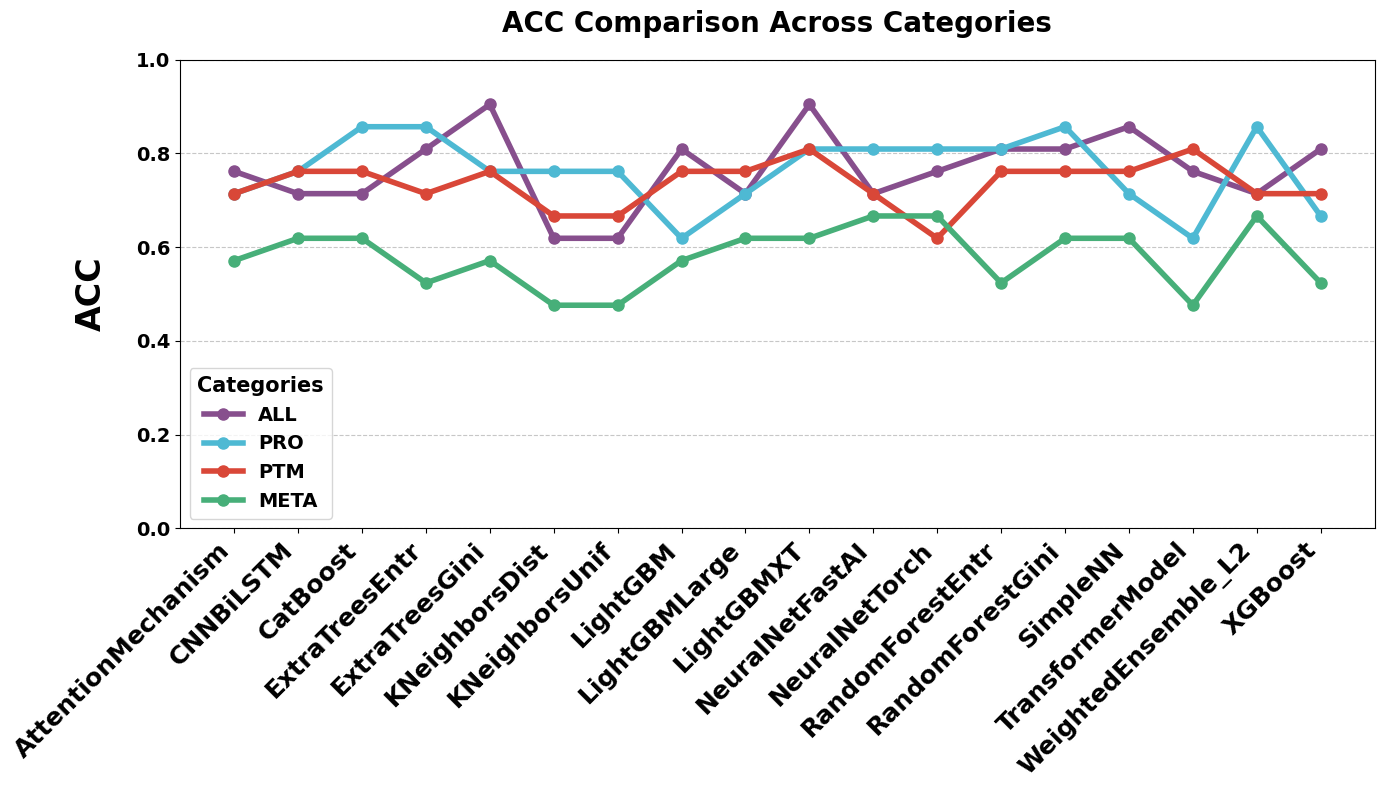

In [48]:
# 读取上传的CSV文件
model_all = pd.read_csv('model_all.csv')
model_pro = pd.read_csv('model_pro.csv')
model_ptm = pd.read_csv('model_ptm.csv')
model_meta = pd.read_csv('model_meta.csv')

# 获取所有模型的统一列表，确保模型一致性
all_models = pd.concat([
    model_all['model'], 
    model_pro['model'], 
    model_ptm['model'], 
    model_meta['model']
]).unique()
all_models = sorted(all_models)  # 对模型名称排序

# 将每个数据集重新索引以包含所有模型，并用 NaN 填充缺失的 ACC 值
model_all_reindexed = model_all.set_index('model').reindex(all_models).reset_index()
model_pro_reindexed = model_pro.set_index('model').reindex(all_models).reset_index()
model_ptm_reindexed = model_ptm.set_index('model').reindex(all_models).reset_index()
model_meta_reindexed = model_meta.set_index('model').reindex(all_models).reset_index()

# 创建图形
plt.figure(figsize=(14, 8))

# 定义类别和对应的数据集
categories = {
    'ALL': model_all_reindexed,
    'PRO': model_pro_reindexed,
    'PTM': model_ptm_reindexed,
    'META': model_meta_reindexed
}

# 定义每个类别的颜色
category_colors = ['#874F8D', '#4EB9D3', '#D94738', '#47AF79'] 

# 绘制每个类别的 ACC 折线图，确保线条连续
for (category, data), color in zip(categories.items(), category_colors):
    plt.plot(data['model'], data['accuracy'], label=category, color=color, marker='o', linewidth=4, markersize=8)

# 设置图形样式
plt.xticks(rotation=45, ha='right', fontsize=18, fontweight='bold')  # 旋转模型名称并调整字体
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14, fontweight='bold')  # 设置纵坐标刻度
#plt.xlabel('Model', fontsize=18)  # 设置x轴标签
plt.ylabel('ACC', fontsize=24, weight='bold', labelpad=20)  # 设置y轴标签
plt.title('ACC Comparison Across Categories', fontsize=20, weight='bold', pad=20)  # 设置标题

# 修改后的图例代码（兼容旧版本）
plt.legend(
    title='Categories',
    prop={'weight': 'bold', 'size': 14},          # 同时设置字体大小和加粗
    title_fontproperties={'weight': 'bold', 'size': 15}      # 单独设置标题加粗
)
#plt.legend(title='Categories', fontsize=16, title_fontsize=18, fontweight='bold') # 添加图例
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加网格线
plt.tight_layout()  # 调整布局

# 保存图形
plt.savefig('ACC_Comparison.png', dpi=300)

# 显示图形
plt.show()

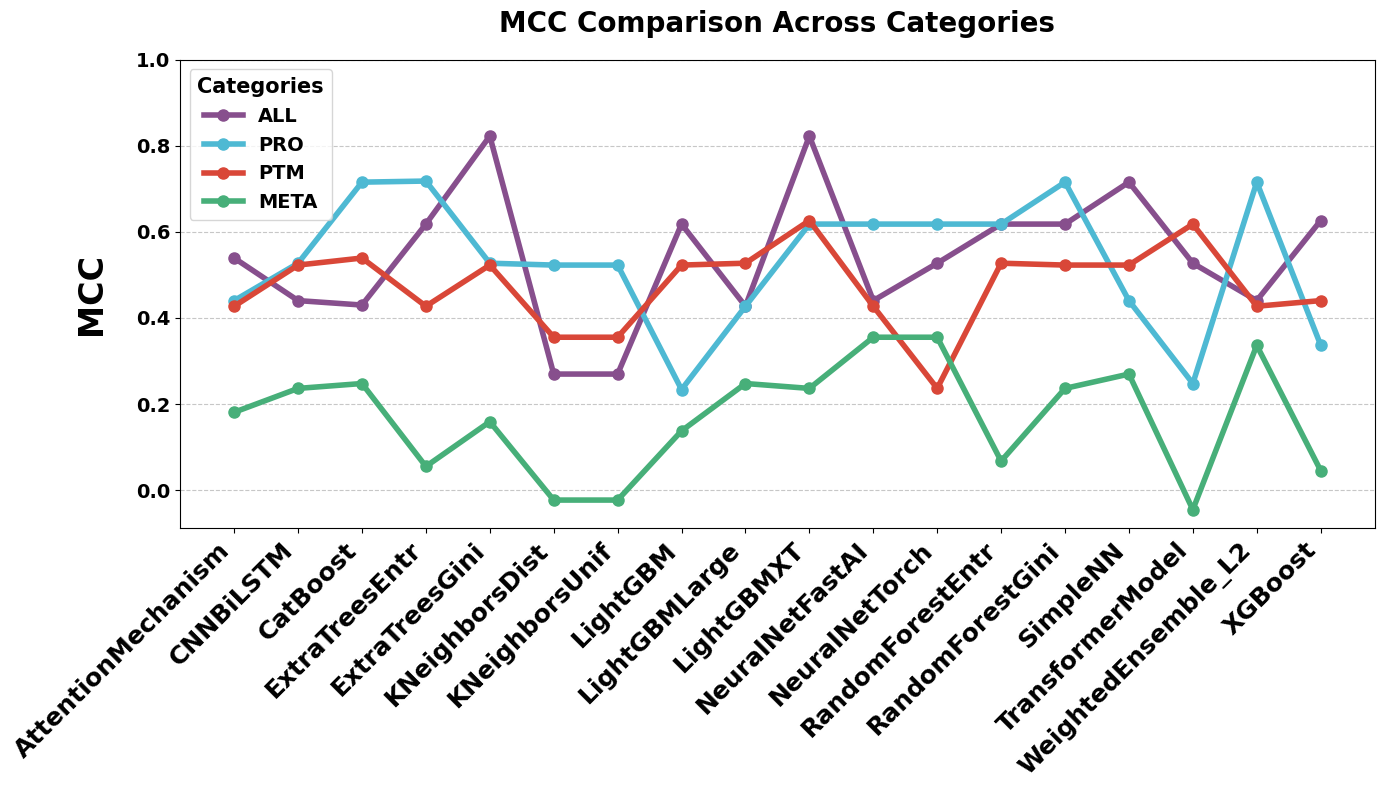

In [49]:
# 创建图形
plt.figure(figsize=(14, 8))

# 定义类别和对应的数据集
categories = {
    'ALL': model_all_reindexed,
    'PRO': model_pro_reindexed,
    'PTM': model_ptm_reindexed,
    'META': model_meta_reindexed
}

# 定义每个类别的颜色
category_colors = ['#874F8D', '#4EB9D3', '#D94738', '#47AF79'] 

# 绘制每个类别的 ACC 折线图，确保线条连续
for (category, data), color in zip(categories.items(), category_colors):
    plt.plot(data['model'], data['mcc'], label=category, color=color, marker='o', linewidth=4, markersize=8)

# 设置图形样式
plt.xticks(rotation=45, ha='right', fontsize=18, fontweight='bold')  # 旋转模型名称并调整字体
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14, fontweight='bold')  # 设置纵坐标刻度
#plt.xlabel('Model', fontsize=18)  # 设置x轴标签
plt.ylabel('MCC', fontsize=24, weight='bold', labelpad=20)  # 设置y轴标签
plt.title('MCC Comparison Across Categories', fontsize=20, weight='bold', pad=20)  # 设置标题
# 修改后的图例代码（兼容旧版本）
plt.legend(
    title='Categories',
    prop={'weight': 'bold', 'size': 14},          # 同时设置字体大小和加粗
    title_fontproperties={'weight': 'bold', 'size': 15}      # 单独设置标题加粗
)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加网格线
plt.tight_layout()  # 调整布局

# 保存图形
plt.savefig('MCC_Comparison.png', dpi=300)

# 显示图形
plt.show()

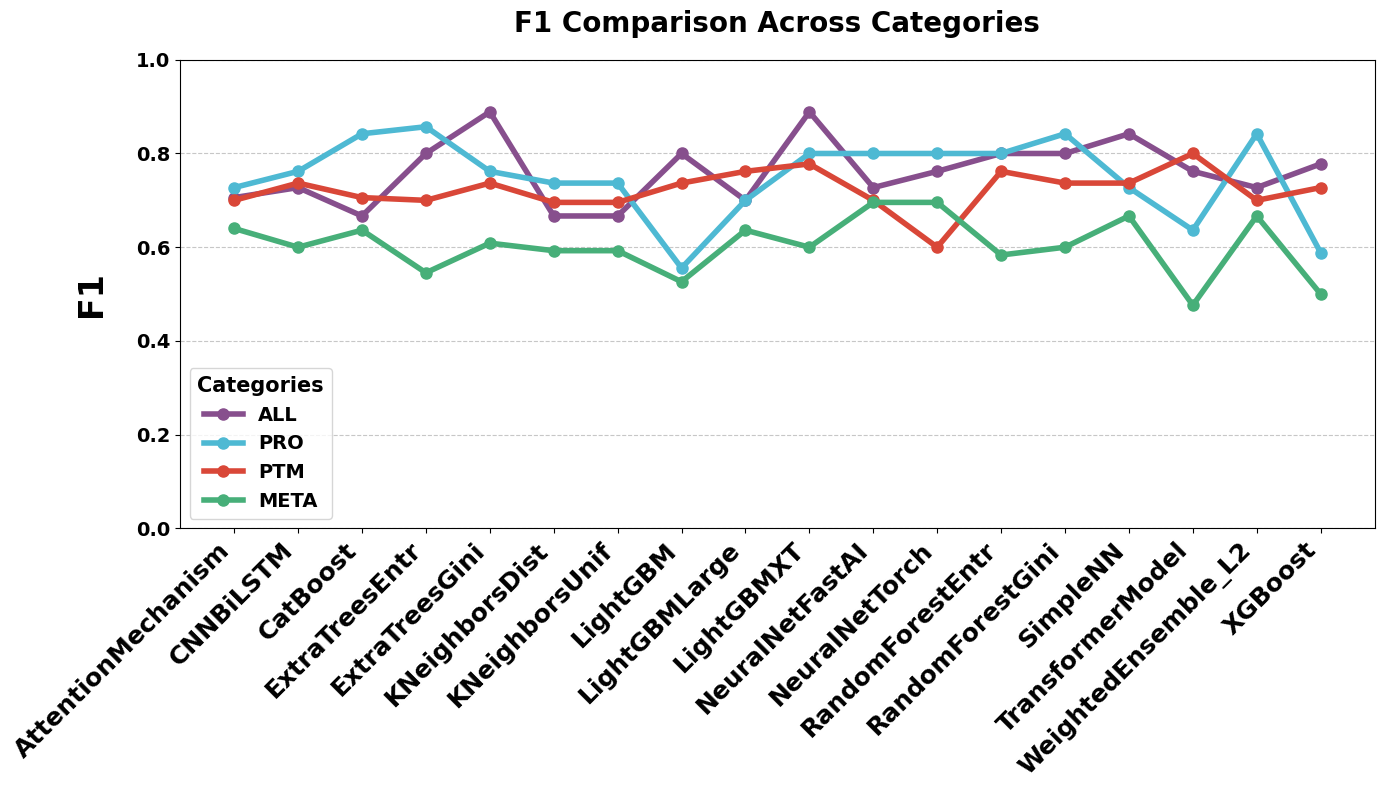

In [68]:
# 创建图形
plt.figure(figsize=(14, 8))

# 定义类别和对应的数据集
categories = {
    'ALL': model_all_reindexed,
    'PRO': model_pro_reindexed,
    'PTM': model_ptm_reindexed,
    'META': model_meta_reindexed
}

# 定义每个类别的颜色
category_colors = ['#874F8D', '#4EB9D3', '#D94738', '#47AF79'] 

# 绘制每个类别的 ACC 折线图，确保线条连续
for (category, data), color in zip(categories.items(), category_colors):
    plt.plot(data['model'], data['f1'], label=category, color=color, marker='o', linewidth=4, markersize=8)

# 设置图形样式
plt.xticks(rotation=45, ha='right', fontsize=18, fontweight='bold')  # 旋转模型名称并调整字体
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14, fontweight='bold')  # 设置纵坐标刻度
#plt.xlabel('Model', fontsize=18)  # 设置x轴标签
plt.ylabel('F1', fontsize=24, weight='bold', labelpad=20)  # 设置y轴标签
plt.title('F1 Comparison Across Categories', fontsize=20, weight='bold', pad=20)  # 设置标题
# 修改后的图例代码（兼容旧版本）
plt.legend(
    title='Categories',
    prop={'weight': 'bold', 'size': 14},          # 同时设置字体大小和加粗
    title_fontproperties={'weight': 'bold', 'size': 15}      # 单独设置标题加粗
)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加网格线
plt.tight_layout()  # 调整布局

# 保存图形
plt.savefig('F1_Comparison.png', dpi=300)

# 显示图形
plt.show()

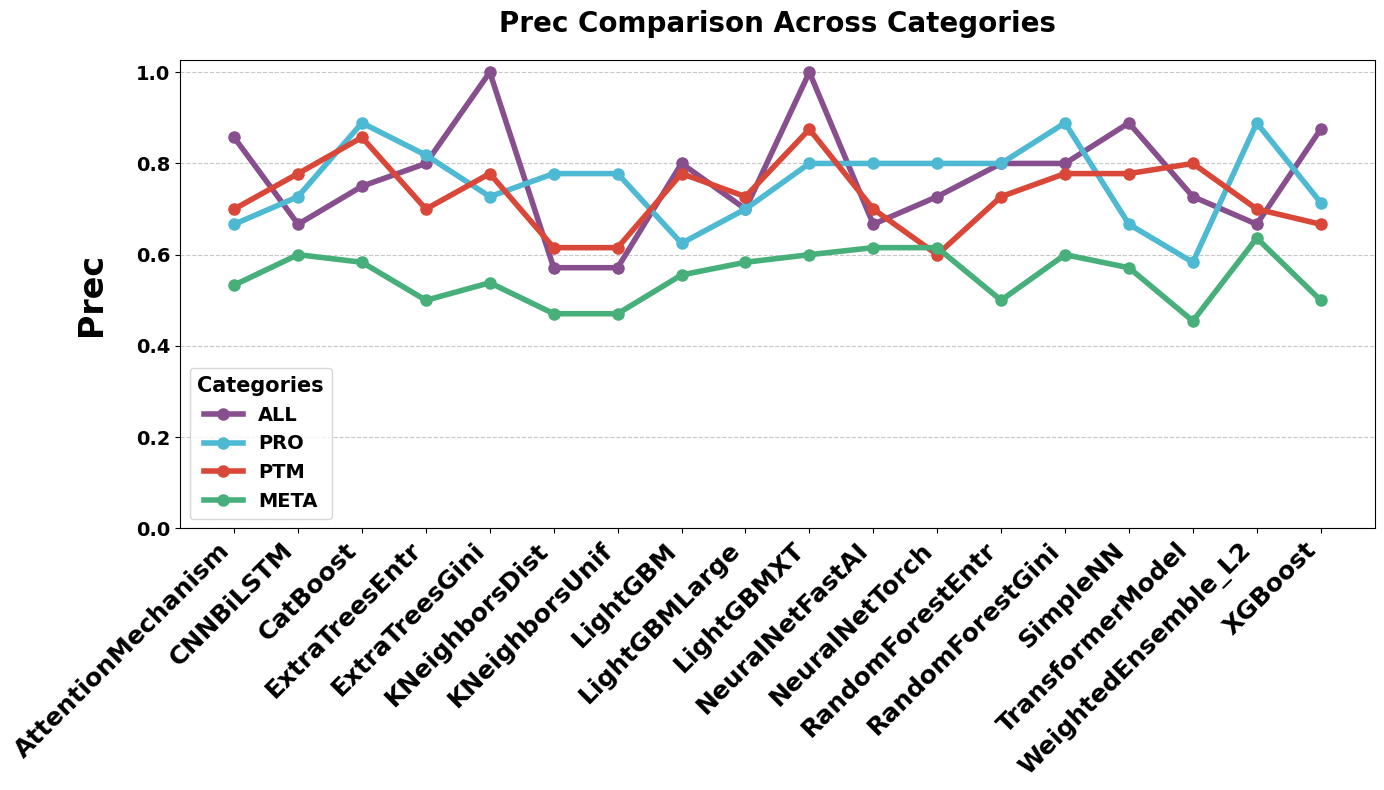

In [51]:
# 创建图形
plt.figure(figsize=(14, 8))

# 定义类别和对应的数据集
categories = {
    'ALL': model_all_reindexed,
    'PRO': model_pro_reindexed,
    'PTM': model_ptm_reindexed,
    'META': model_meta_reindexed
}

# 定义每个类别的颜色
category_colors = ['#874F8D', '#4EB9D3', '#D94738', '#47AF79'] 

# 绘制每个类别的 ACC 折线图，确保线条连续
for (category, data), color in zip(categories.items(), category_colors):
    plt.plot(data['model'], data['precision'], label=category, color=color, marker='o', linewidth=4, markersize=8)

# 设置图形样式
plt.xticks(rotation=45, ha='right', fontsize=18, fontweight='bold')  # 旋转模型名称并调整字体
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14, fontweight='bold')  # 设置纵坐标刻度
#plt.xlabel('Model', fontsize=18)  # 设置x轴标签
plt.ylabel('Prec', fontsize=24, weight='bold', labelpad=20)  # 设置y轴标签
plt.title('Prec Comparison Across Categories', fontsize=20, weight='bold', pad=20)  # 设置标题

# 将图例放置在左下角
#plt.legend(title='Categories', fontsize=12, title_fontsize=14, loc='lower left')  # 设置图例位置
# 修改后的图例代码（兼容旧版本）
plt.legend(
    title='Categories',
    prop={'weight': 'bold', 'size': 14},          # 同时设置字体大小和加粗
    title_fontproperties={'weight': 'bold', 'size': 15}      # 单独设置标题加粗
)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加网格线
plt.tight_layout()  # 调整布局

# 保存图形
plt.savefig('Precision_Comparison.png', dpi=300)

# 显示图形
plt.show()

Processing Deep Learning Models...
Processing AutoGluon Models...


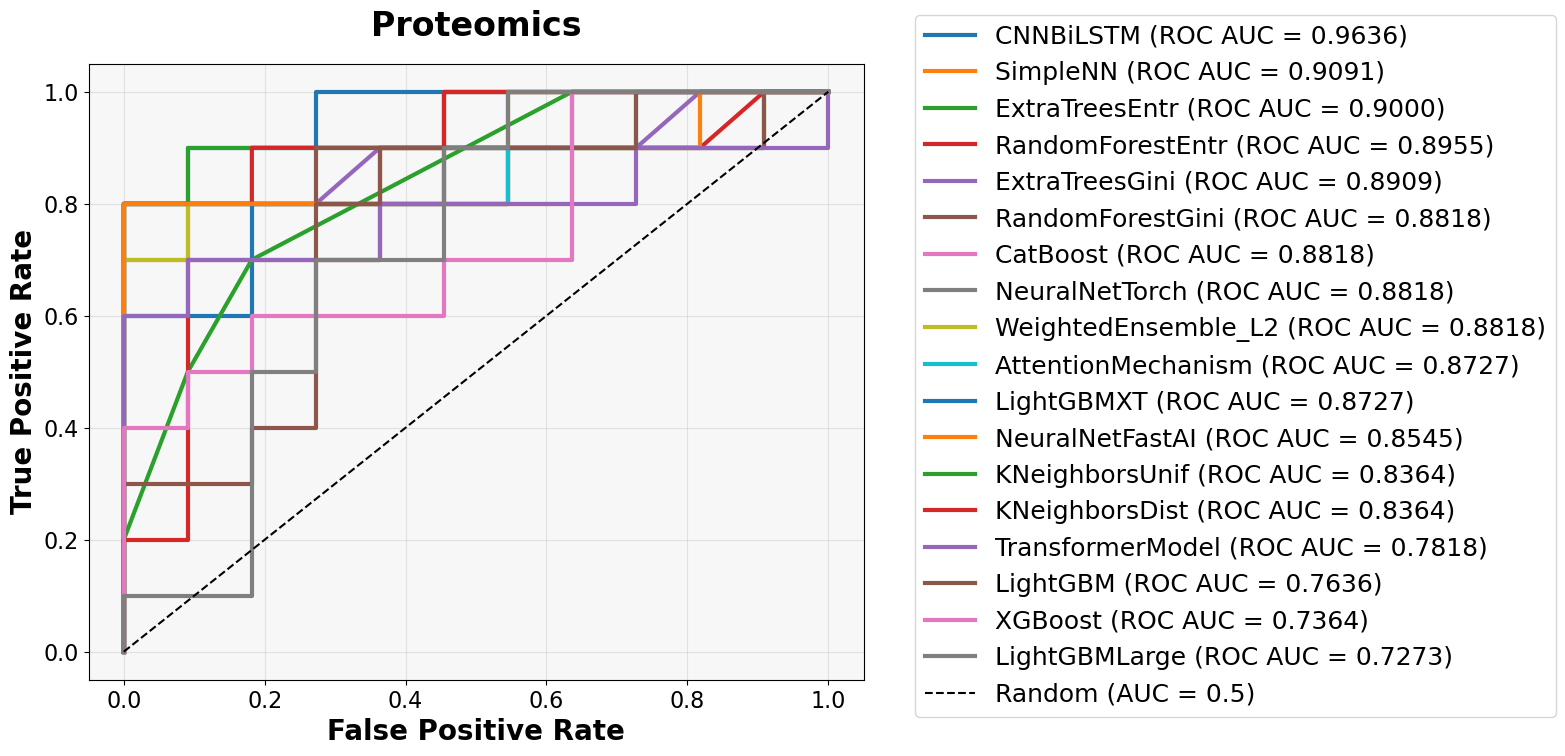

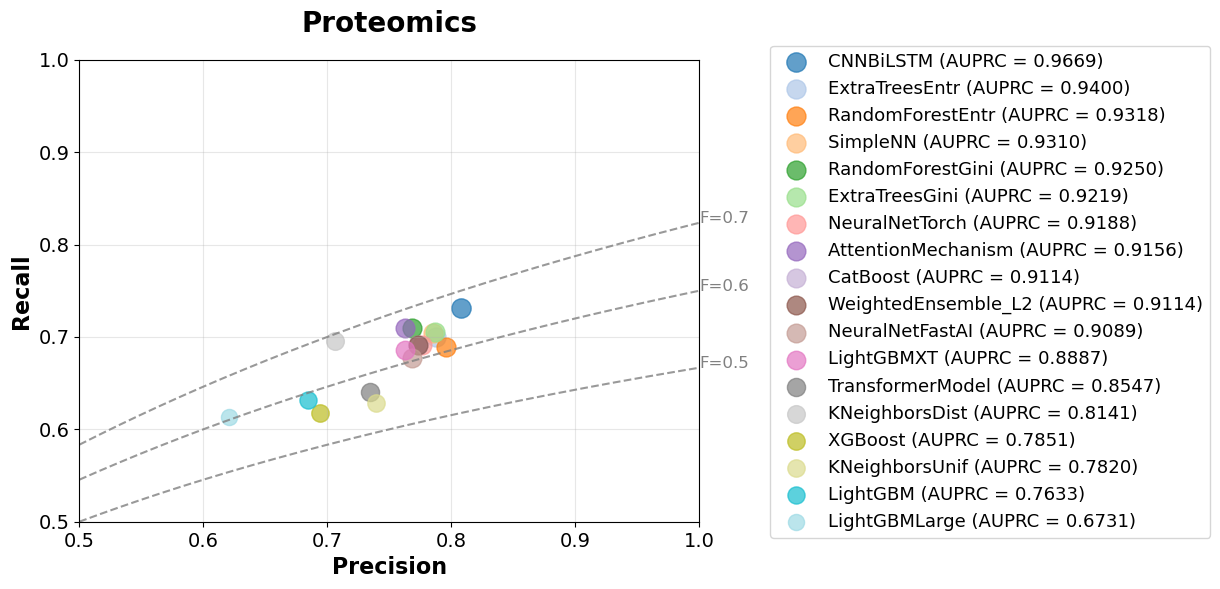

In [69]:
def plot_combined_roc_pr_curve_pro(dl_model_files, dl_model_names, model_classes, autogluon_predictor, test_data, feature_type):
    """
    绘制深度学习模型的 ROC 曲线，以及 PR 曲线的散点图形式（包含 F1-score 等值线），并按 AUC 和 AP 排序。

    :param dl_model_files: 深度学习模型权重文件路径列表
    :param dl_model_names: 深度学习模型的名称列表
    :param model_classes: 深度学习模型类的字典 {model_name: model_class}
    :param autogluon_predictor: AutoGluon 预测器对象
    :param test_data: 测试数据，包括标签列 'label'
    :param feature_type: 使用的特征类型，用于数据预处理
    :param output_path: 输出图片的保存路径
    """
    # 检查数据有效性
    if 'label' not in test_data.columns:
        raise ValueError("The 'label' column is missing in the test_data.")

    y_true = test_data['label'].values  # 提取真实标签
    X_test = test_data.drop(columns=['label']).values  # 提取特征数据

    # 数据标准化
    scaler = StandardScaler()
    X_test = scaler.fit_transform(X_test)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # 统一存储所有模型的 AUC 和 PR 数据
    all_models_roc = {}
    all_models_pr = {}

    # 设置设备
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # 1. 处理深度学习模型
    print("Processing Deep Learning Models...")
    for i, file in enumerate(dl_model_files):
        model_name = dl_model_names[i]
        model_class = model_classes[model_name]

        # 加载模型及其权重
        model = model_class(input_dim=X_test.shape[1])
        model.load_state_dict(torch.load(file))
        model = model.to(device)
        model.eval()

        # 模型预测
        with torch.no_grad():
            y_pred = model(X_test_tensor.to(device)).cpu().squeeze().numpy()

        # 计算 ROC 曲线
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        all_models_roc[model_name] = (roc_auc, fpr, tpr)

        # 计算 PR 曲线
        precision, recall, _ = precision_recall_curve(y_true, y_pred)
        ap = average_precision_score(y_true, y_pred)  # Average Precision
        all_models_pr[model_name] = (ap, precision, recall)

    # 2. 处理 AutoGluon 模型
    print("Processing AutoGluon Models...")
    for model_name in autogluon_predictor.model_names():
        y_scores_df = autogluon_predictor.predict_proba(test_data.drop(columns=['label']), model=model_name)
        y_scores = y_scores_df.iloc[:, 1].values  # 提取正类概率

        # 计算 ROC 曲线
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        cleaned_model_name = model_name.replace('_BAG_L1', '')  # 清理模型名
        all_models_roc[cleaned_model_name] = (roc_auc, fpr, tpr)

        # 计算 PR 曲线
        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        ap = average_precision_score(y_true, y_scores)
        all_models_pr[cleaned_model_name] = (ap, precision, recall)

    # 3. 按 AUC 和 AP 排序
    sorted_models_roc = sorted(all_models_roc.items(), key=lambda x: x[1][0], reverse=True)  # 按 ROC AUC 排序
    sorted_models_pr = sorted(all_models_pr.items(), key=lambda x: x[1][0], reverse=True)  # 按 AP 排序

    # 4. 绘制 ROC 曲线
    plt.figure(figsize=(10, 8))
    ax = plt.gca()  # 获取当前坐标轴
    ax.set_facecolor('#f7f7f7')  # 设置背景颜色为浅灰色
    for model_name, (roc_auc, fpr, tpr) in sorted_models_roc:  # 按排序后的顺序绘制
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.4f})", linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label="Random (AUC = 0.5)")
    plt.title("Proteomics", fontsize=24, weight='bold',pad=20)
    plt.xlabel("False Positive Rate", fontsize=20, weight='bold')
    plt.ylabel("True Positive Rate", fontsize=20, weight='bold')
    
    # 调整图例的位置，放置在图的外面（右侧）
    plt.legend(loc="upper left", fontsize=18, bbox_to_anchor=(1.05,1.1))# 将图例移到右侧
    plt.tick_params(axis='both', which='major', labelsize=16)  # 设置坐标轴刻度字体大小为14
    plt.grid(alpha=0.3)
    plt.savefig(f"1roc_pro.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

    # 5. 绘制 PR 散点图
    plt.figure(figsize=(8, 6))

    # 添加 F1-score 等值线
    def plot_f1_lines():
        f1_scores = [0.5, 0.6, 0.7]  # F1 分数
        for f1 in f1_scores:
            x = np.linspace(0.5, 1, 500)  # Precision 范围
            y = (2 * f1 * x) / (f1 + x)  # 计算 Recall
            plt.plot(x, y, linestyle="--", color="gray", alpha=0.8)
            plt.text(x[-1], y[-1], f"F={f1:.1f}", fontsize=12, color='gray')

    plot_f1_lines()

    # 定义颜色和绘制模型散点
    colors = plt.cm.tab20(np.linspace(0, 1, len(sorted_models_pr)))  # 生成不同的颜色
    for idx, (model_name, (ap, precision, recall)) in enumerate(sorted_models_pr):  # 按排序后的顺序绘制
        precision_mean = precision.mean()
        recall_mean = recall.mean()
        plt.scatter(
            precision_mean, recall_mean,  # Precision 和 Recall 平均值
            s=ap * 200,  # AP 值控制点大小
            alpha=0.7,
            color=colors[idx],  # 使用不同颜色
            label=f"{model_name} (AUPRC = {ap:.4f})"
        )

    # 图表设置
    plt.title("Proteomics", fontsize=20, weight='bold', pad=20)
    plt.xlabel("Precision", fontsize=16, weight='bold')
    plt.ylabel("Recall", fontsize=16, weight='bold')
    plt.xlim(0.5, 1.0)
    plt.ylim(0.5, 1.0)
    plt.tick_params(axis='both', which='major', labelsize=14)  # 设置坐标轴刻度字体大小为14
    
    # 将图例移到外面（右侧）
    plt.legend(bbox_to_anchor=(1.1, 1.05), loc='upper left', fontsize=13, frameon=True)  # 将图例移出图表
    plt.grid(alpha=0.3)

    # 保存并展示 PR 图
    plt.savefig(f"1pr_scatter_pro.png", dpi=300, bbox_inches="tight")
    plt.show()

# 示例：输入参数
dl_model_files = [
    "TransformerModel_best_model_pro.pt",
    "AttentionMechanism_best_model_pro.pt",
    "SimpleNN_best_model_pro.pt",
    "CNNBiLSTM_best_model_pro.pt"
]
dl_model_names = ["TransformerModel", "AttentionMechanism", "SimpleNN", "CNNBiLSTM"]

# 模型类字典，需根据定义替换为实际类名
model_classes = {
    "TransformerModel": TransformerModel,
    "AttentionMechanism": AttentionMechanism,
    "SimpleNN": SimpleNN,
    "CNNBiLSTM": CNNBiLSTM
}

# 加载测试数据和 AutoGluon 预测器
test_data = test_data_pro
predictor = predictor_pro

# 调用函数绘制 ROC 和 PR 图
plot_combined_roc_pr_curve_pro(dl_model_files, dl_model_names, model_classes, predictor, test_data, feature_type="Proteomics")

Processing Deep Learning Models...
Processing AutoGluon Models...


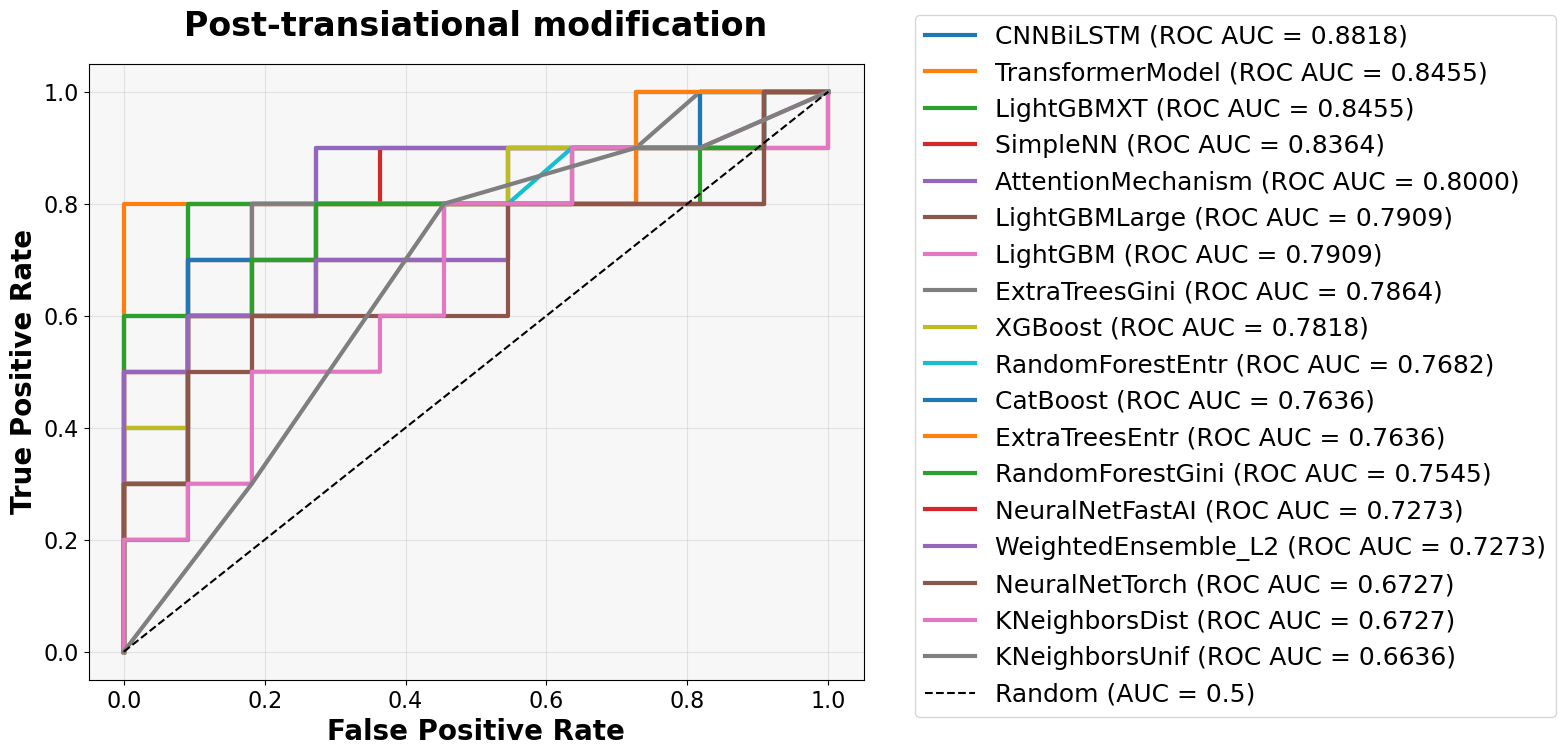

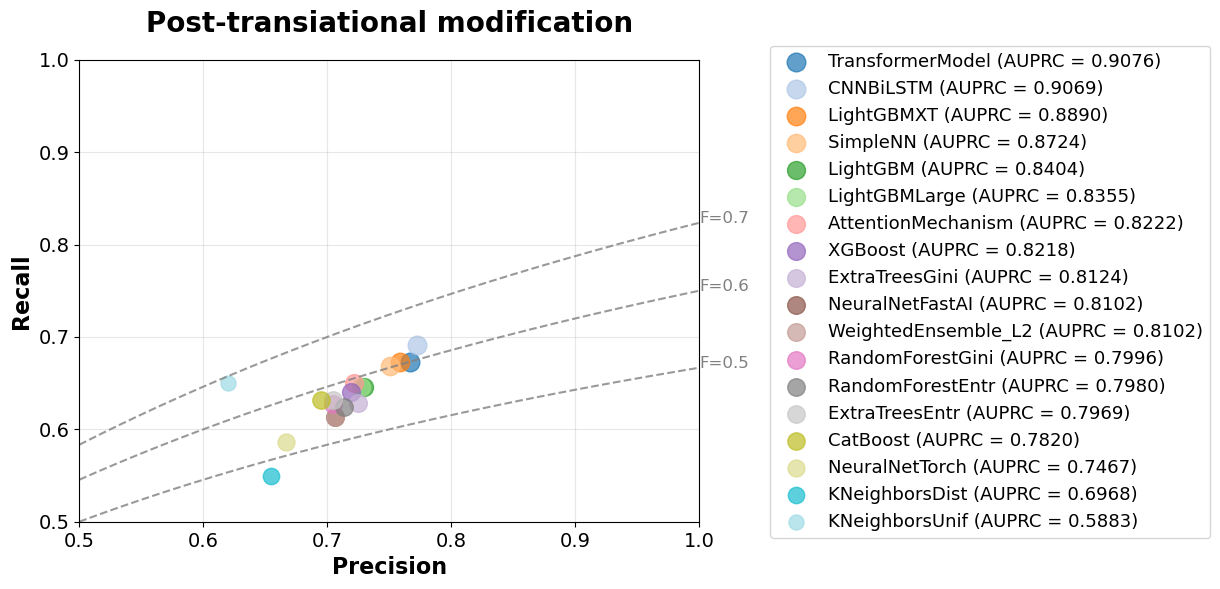

In [70]:
def plot_combined_roc_pr_curve_ptm(dl_model_files, dl_model_names, model_classes, autogluon_predictor, test_data, feature_type):
    """
    绘制深度学习模型的 ROC 曲线，以及 PR 曲线的散点图形式（包含 F1-score 等值线），并按 AUC 和 AP 排序。

    :param dl_model_files: 深度学习模型权重文件路径列表
    :param dl_model_names: 深度学习模型的名称列表
    :param model_classes: 深度学习模型类的字典 {model_name: model_class}
    :param autogluon_predictor: AutoGluon 预测器对象
    :param test_data: 测试数据，包括标签列 'label'
    :param feature_type: 使用的特征类型，用于数据预处理
    :param output_path: 输出图片的保存路径
    """
    # 检查数据有效性
    if 'label' not in test_data.columns:
        raise ValueError("The 'label' column is missing in the test_data.")

    y_true = test_data['label'].values  # 提取真实标签
    X_test = test_data.drop(columns=['label']).values  # 提取特征数据

    # 数据标准化
    scaler = StandardScaler()
    X_test = scaler.fit_transform(X_test)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # 统一存储所有模型的 AUC 和 PR 数据
    all_models_roc = {}
    all_models_pr = {}

    # 设置设备
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

   # 1. 处理深度学习模型
    print("Processing Deep Learning Models...")
    for i, file in enumerate(dl_model_files):
        model_name = dl_model_names[i]
        model_class = model_classes[model_name]

        # 加载模型及其权重
        model = model_class(input_dim=X_test.shape[1])
        model.load_state_dict(torch.load(file))
        model = model.to(device)
        model.eval()

        # 模型预测
        with torch.no_grad():
            y_pred = model(X_test_tensor.to(device)).cpu().squeeze().numpy()

        # 计算 ROC 曲线
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        all_models_roc[model_name] = (roc_auc, fpr, tpr)

        # 计算 PR 曲线
        precision, recall, _ = precision_recall_curve(y_true, y_pred)
        ap = average_precision_score(y_true, y_pred)  # Average Precision
        all_models_pr[model_name] = (ap, precision, recall)

    # 2. 处理 AutoGluon 模型
    print("Processing AutoGluon Models...")
    for model_name in autogluon_predictor.model_names():
        y_scores_df = autogluon_predictor.predict_proba(test_data.drop(columns=['label']), model=model_name)
        y_scores = y_scores_df.iloc[:, 1].values  # 提取正类概率

        # 计算 ROC 曲线
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        cleaned_model_name = model_name.replace('_BAG_L1', '')  # 清理模型名
        all_models_roc[cleaned_model_name] = (roc_auc, fpr, tpr)

        # 计算 PR 曲线
        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        ap = average_precision_score(y_true, y_scores)
        all_models_pr[cleaned_model_name] = (ap, precision, recall)

    # 3. 按 AUC 和 AP 排序
    sorted_models_roc = sorted(all_models_roc.items(), key=lambda x: x[1][0], reverse=True)  # 按 ROC AUC 排序
    sorted_models_pr = sorted(all_models_pr.items(), key=lambda x: x[1][0], reverse=True)  # 按 AP 排序

    # 4. 绘制 ROC 曲线
    plt.figure(figsize=(10, 8))
    ax = plt.gca()  # 获取当前坐标轴
    ax.set_facecolor('#f7f7f7')  # 设置背景颜色为浅灰色
    for model_name, (roc_auc, fpr, tpr) in sorted_models_roc:  # 按排序后的顺序绘制
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.4f})", linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label="Random (AUC = 0.5)")
    plt.title("Post-transiational modification", fontsize=24, weight='bold',pad=20)
    plt.xlabel("False Positive Rate", fontsize=20, weight='bold')
    plt.ylabel("True Positive Rate", fontsize=20, weight='bold')
    
    # 调整图例的位置，放置在图的外面（右侧）
    plt.legend(loc="upper left", fontsize=18, bbox_to_anchor=(1.05,1.1))# 将图例移到右侧
    plt.tick_params(axis='both', which='major', labelsize=16)  # 设置坐标轴刻度字体大小为14
    plt.grid(alpha=0.3)
    plt.savefig(f"1roc_ptm.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

    # 5. 绘制 PR 散点图
    plt.figure(figsize=(8, 6))

    # 添加 F1-score 等值线
    def plot_f1_lines():
        f1_scores = [0.5, 0.6, 0.7]  # F1 分数
        for f1 in f1_scores:
            x = np.linspace(0.5, 1, 500)  # Precision 范围
            y = (2 * f1 * x) / (f1 + x)  # 计算 Recall
            plt.plot(x, y, linestyle="--", color="gray", alpha=0.8)
            plt.text(x[-1], y[-1], f"F={f1:.1f}", fontsize=12, color='gray')

    plot_f1_lines()

    # 定义颜色和绘制模型散点
    colors = plt.cm.tab20(np.linspace(0, 1, len(sorted_models_pr)))  # 生成不同的颜色
    for idx, (model_name, (ap, precision, recall)) in enumerate(sorted_models_pr):  # 按排序后的顺序绘制
        precision_mean = precision.mean()
        recall_mean = recall.mean()
        plt.scatter(
            precision_mean, recall_mean,  # Precision 和 Recall 平均值
            s=ap * 200,  # AP 值控制点大小
            alpha=0.7,
            color=colors[idx],  # 使用不同颜色
            label=f"{model_name} (AUPRC = {ap:.4f})"
        )

    # 图表设置
    plt.title("Post-transiational modification", fontsize=20, weight='bold', pad=20)
    plt.xlabel("Precision", fontsize=16, weight='bold')
    plt.ylabel("Recall", fontsize=16, weight='bold')
    plt.xlim(0.5, 1.0)
    plt.ylim(0.5, 1.0)
    plt.tick_params(axis='both', which='major', labelsize=14)  # 设置坐标轴刻度字体大小为14
    
    # 将图例移到外面（右侧）
    plt.legend(bbox_to_anchor=(1.1, 1.05), loc='upper left', fontsize=13, frameon=True)  # 将图例移出图表
    plt.grid(alpha=0.3)

    # 保存并展示 PR 图
    plt.savefig(f"1pr_scatter_ptm.png", dpi=300, bbox_inches="tight")
    plt.show()

# 示例：输入参数
dl_model_files = [
    "TransformerModel_best_model_ptm.pt",
    "AttentionMechanism_best_model_ptm.pt",
    "SimpleNN_best_model_ptm.pt",
    "CNNBiLSTM_best_model_ptm.pt"
]
dl_model_names = ["TransformerModel", "AttentionMechanism", "SimpleNN", "CNNBiLSTM"]

# 模型类字典，需根据定义替换为实际类名
model_classes = {
    "TransformerModel": TransformerModel,
    "AttentionMechanism": AttentionMechanism,
    "SimpleNN": SimpleNN,
    "CNNBiLSTM": CNNBiLSTM
}

# 加载测试数据和 AutoGluon 预测器
test_data = test_data_ptm
predictor = predictor_ptm

# 调用函数绘制 ROC 和 PR 图
plot_combined_roc_pr_curve_ptm(dl_model_files, dl_model_names, model_classes, predictor, test_data, feature_type="Protein Post-translational Modification")

Processing Deep Learning Models...
Processing AutoGluon Models...


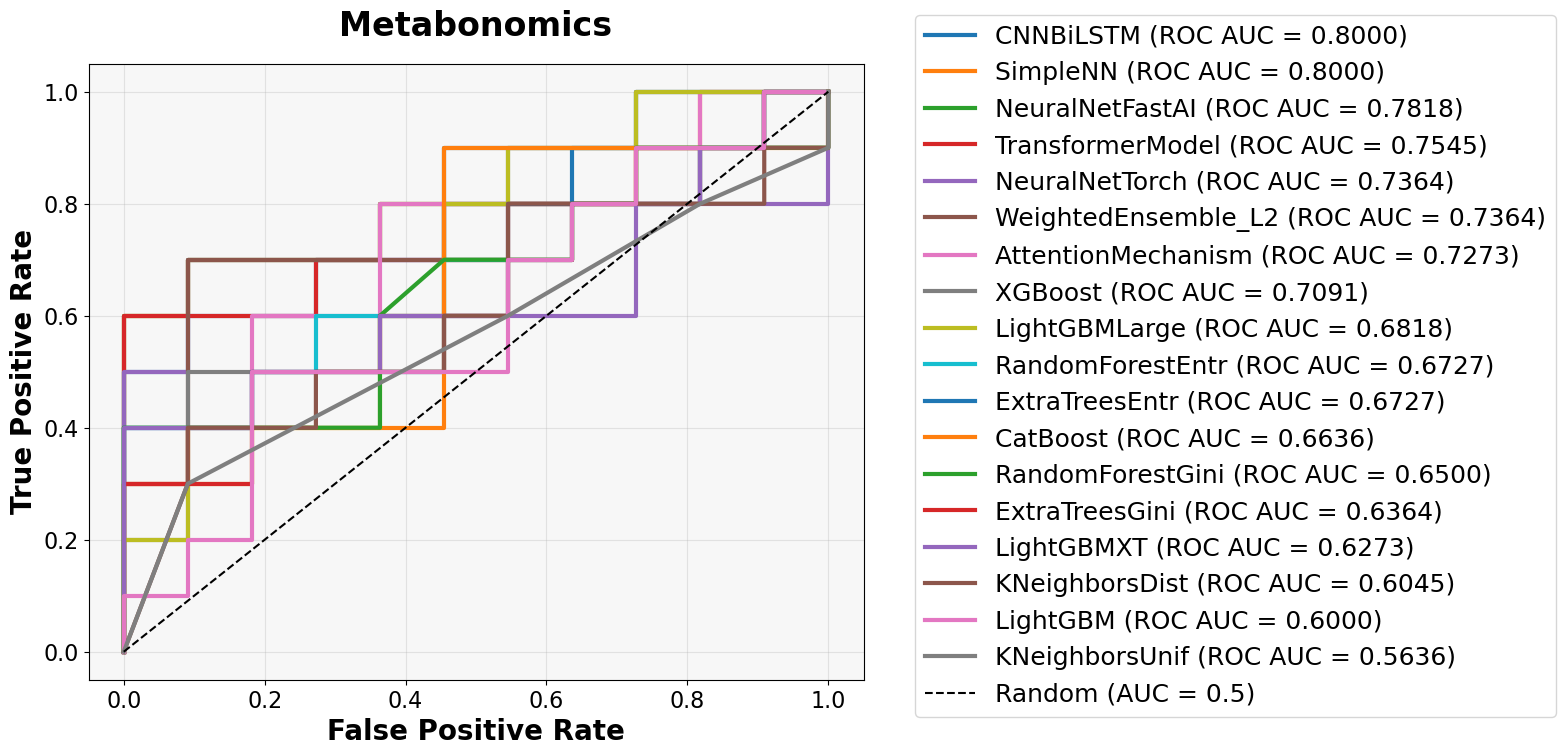

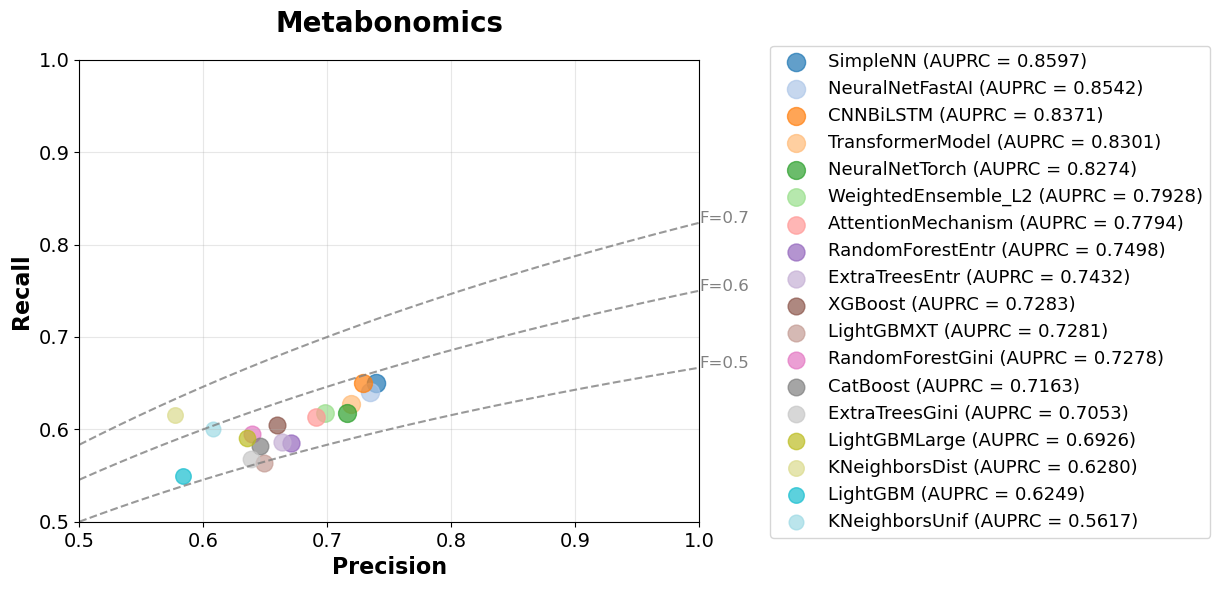

In [71]:
def plot_combined_roc_pr_curve_meta(dl_model_files, dl_model_names, model_classes, autogluon_predictor, test_data, feature_type):
    """
    绘制深度学习模型的 ROC 曲线，以及 PR 曲线的散点图形式（包含 F1-score 等值线），并按 AUC 和 AP 排序。

    :param dl_model_files: 深度学习模型权重文件路径列表
    :param dl_model_names: 深度学习模型的名称列表
    :param model_classes: 深度学习模型类的字典 {model_name: model_class}
    :param autogluon_predictor: AutoGluon 预测器对象
    :param test_data: 测试数据，包括标签列 'label'
    :param feature_type: 使用的特征类型，用于数据预处理
    :param output_path: 输出图片的保存路径
    """
    # 检查数据有效性
    if 'label' not in test_data.columns:
        raise ValueError("The 'label' column is missing in the test_data.")

    y_true = test_data['label'].values  # 提取真实标签
    X_test = test_data.drop(columns=['label']).values  # 提取特征数据

    # 数据标准化
    scaler = StandardScaler()
    X_test = scaler.fit_transform(X_test)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # 统一存储所有模型的 AUC 和 PR 数据
    all_models_roc = {}
    all_models_pr = {}

    # 设置设备
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

     # 1. 处理深度学习模型
    print("Processing Deep Learning Models...")
    for i, file in enumerate(dl_model_files):
        model_name = dl_model_names[i]
        model_class = model_classes[model_name]

        # 加载模型及其权重
        model = model_class(input_dim=X_test.shape[1])
        model.load_state_dict(torch.load(file))
        model = model.to(device)
        model.eval()

        # 模型预测
        with torch.no_grad():
            y_pred = model(X_test_tensor.to(device)).cpu().squeeze().numpy()

        # 计算 ROC 曲线
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        all_models_roc[model_name] = (roc_auc, fpr, tpr)

        # 计算 PR 曲线
        precision, recall, _ = precision_recall_curve(y_true, y_pred)
        ap = average_precision_score(y_true, y_pred)  # Average Precision
        all_models_pr[model_name] = (ap, precision, recall)

    # 2. 处理 AutoGluon 模型
    print("Processing AutoGluon Models...")
    for model_name in autogluon_predictor.model_names():
        y_scores_df = autogluon_predictor.predict_proba(test_data.drop(columns=['label']), model=model_name)
        y_scores = y_scores_df.iloc[:, 1].values  # 提取正类概率

        # 计算 ROC 曲线
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        cleaned_model_name = model_name.replace('_BAG_L1', '')  # 清理模型名
        all_models_roc[cleaned_model_name] = (roc_auc, fpr, tpr)

        # 计算 PR 曲线
        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        ap = average_precision_score(y_true, y_scores)
        all_models_pr[cleaned_model_name] = (ap, precision, recall)

    # 3. 按 AUC 和 AP 排序
    sorted_models_roc = sorted(all_models_roc.items(), key=lambda x: x[1][0], reverse=True)  # 按 ROC AUC 排序
    sorted_models_pr = sorted(all_models_pr.items(), key=lambda x: x[1][0], reverse=True)  # 按 AP 排序

    # 4. 绘制 ROC 曲线
    plt.figure(figsize=(10, 8))
    ax = plt.gca()  # 获取当前坐标轴
    ax.set_facecolor('#f7f7f7')  # 设置背景颜色为浅灰色
    for model_name, (roc_auc, fpr, tpr) in sorted_models_roc:  # 按排序后的顺序绘制
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.4f})", linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label="Random (AUC = 0.5)")
    plt.title("Metabonomics", fontsize=24, weight='bold',pad=20)
    plt.xlabel("False Positive Rate", fontsize=20, weight='bold')
    plt.ylabel("True Positive Rate", fontsize=20, weight='bold')
    
    # 调整图例的位置，放置在图的外面（右侧）
    plt.legend(loc="upper left", fontsize=18, bbox_to_anchor=(1.05,1.1))# 将图例移到右侧
    plt.tick_params(axis='both', which='major', labelsize=16)  # 设置坐标轴刻度字体大小为14
    plt.grid(alpha=0.3)
    plt.savefig(f"1roc_meta.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

    # 5. 绘制 PR 散点图
    plt.figure(figsize=(8, 6))

    # 添加 F1-score 等值线
    def plot_f1_lines():
        f1_scores = [0.5, 0.6, 0.7]  # F1 分数
        for f1 in f1_scores:
            x = np.linspace(0.5, 1, 500)  # Precision 范围
            y = (2 * f1 * x) / (f1 + x)  # 计算 Recall
            plt.plot(x, y, linestyle="--", color="gray", alpha=0.8)
            plt.text(x[-1], y[-1], f"F={f1:.1f}", fontsize=12, color='gray')

    plot_f1_lines()

    # 定义颜色和绘制模型散点
    colors = plt.cm.tab20(np.linspace(0, 1, len(sorted_models_pr)))  # 生成不同的颜色
    for idx, (model_name, (ap, precision, recall)) in enumerate(sorted_models_pr):  # 按排序后的顺序绘制
        precision_mean = precision.mean()
        recall_mean = recall.mean()
        plt.scatter(
            precision_mean, recall_mean,  # Precision 和 Recall 平均值
            s=ap * 200,  # AP 值控制点大小
            alpha=0.7,
            color=colors[idx],  # 使用不同颜色
            label=f"{model_name} (AUPRC = {ap:.4f})"
        )

    # 图表设置
    plt.title("Metabonomics", fontsize=20, weight='bold', pad=20)
    plt.xlabel("Precision", fontsize=16, weight='bold')
    plt.ylabel("Recall", fontsize=16, weight='bold')
    plt.xlim(0.5, 1.0)
    plt.ylim(0.5, 1.0)
    plt.tick_params(axis='both', which='major', labelsize=14)  # 设置坐标轴刻度字体大小为14
    
    # 将图例移到外面（右侧）
    plt.legend(bbox_to_anchor=(1.1, 1.05), loc='upper left', fontsize=13, frameon=True)  # 将图例移出图表
    plt.grid(alpha=0.3)

    # 保存并展示 PR 图
    plt.savefig(f"1pr_scatter_meta.png", dpi=300, bbox_inches="tight")
    plt.show()

# 示例：输入参数
dl_model_files = [
    "TransformerModel_best_model_meta.pt",
    "AttentionMechanism_best_model_meta.pt",
    "SimpleNN_best_model_meta.pt",
    "CNNBiLSTM_best_model_meta.pt"
]
dl_model_names = ["TransformerModel", "AttentionMechanism", "SimpleNN", "CNNBiLSTM"]

# 模型类字典，需根据定义替换为实际类名
model_classes = {
    "TransformerModel": TransformerModel,
    "AttentionMechanism": AttentionMechanism,
    "SimpleNN": SimpleNN,
    "CNNBiLSTM": CNNBiLSTM
}

# 加载测试数据和 AutoGluon 预测器
test_data = test_data_meta
predictor = predictor_meta

# 调用函数绘制 ROC 和 PR 图
plot_combined_roc_pr_curve_meta(dl_model_files, dl_model_names, model_classes, predictor, test_data, feature_type="Metabonomics")

Processing Deep Learning Models...
Processing AutoGluon Models...


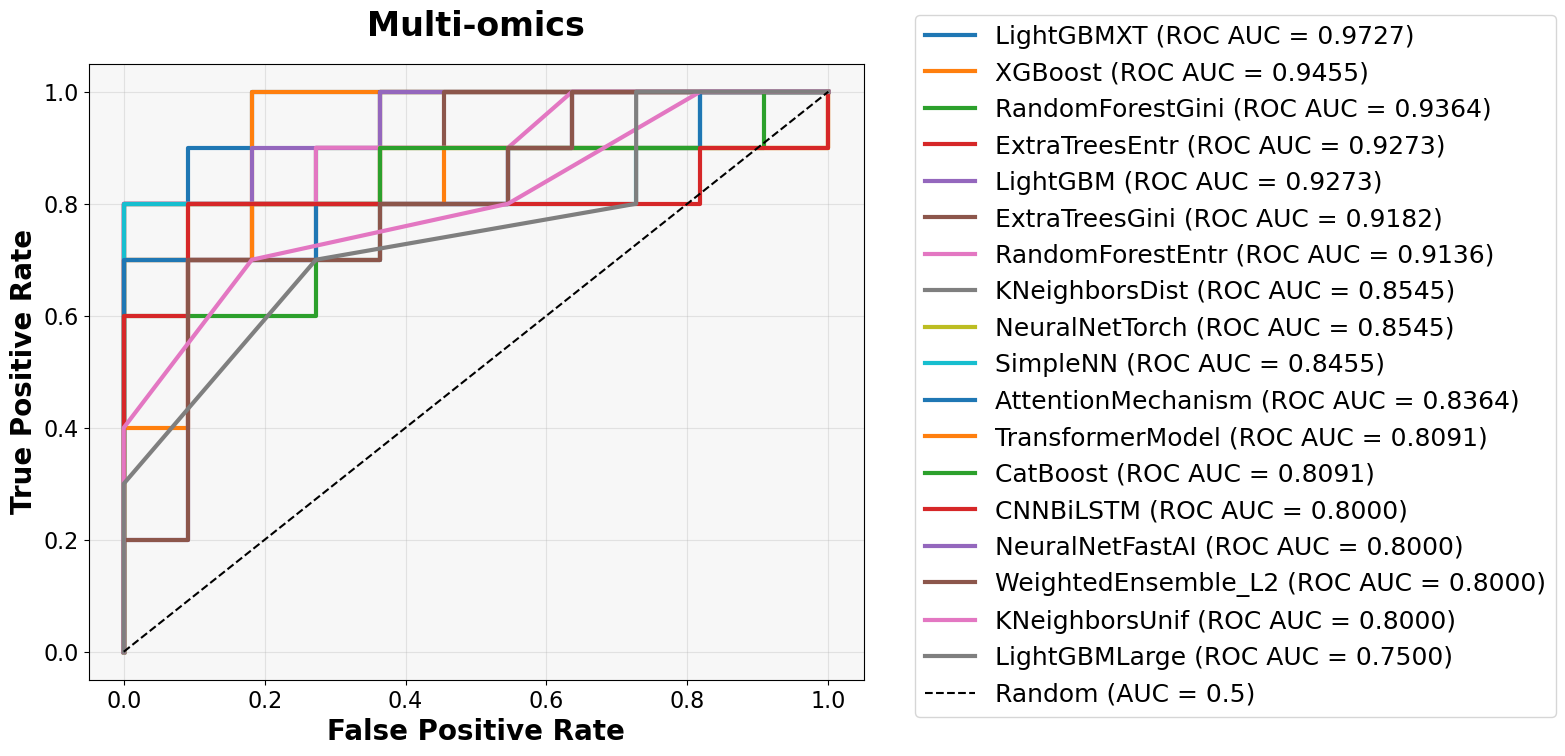

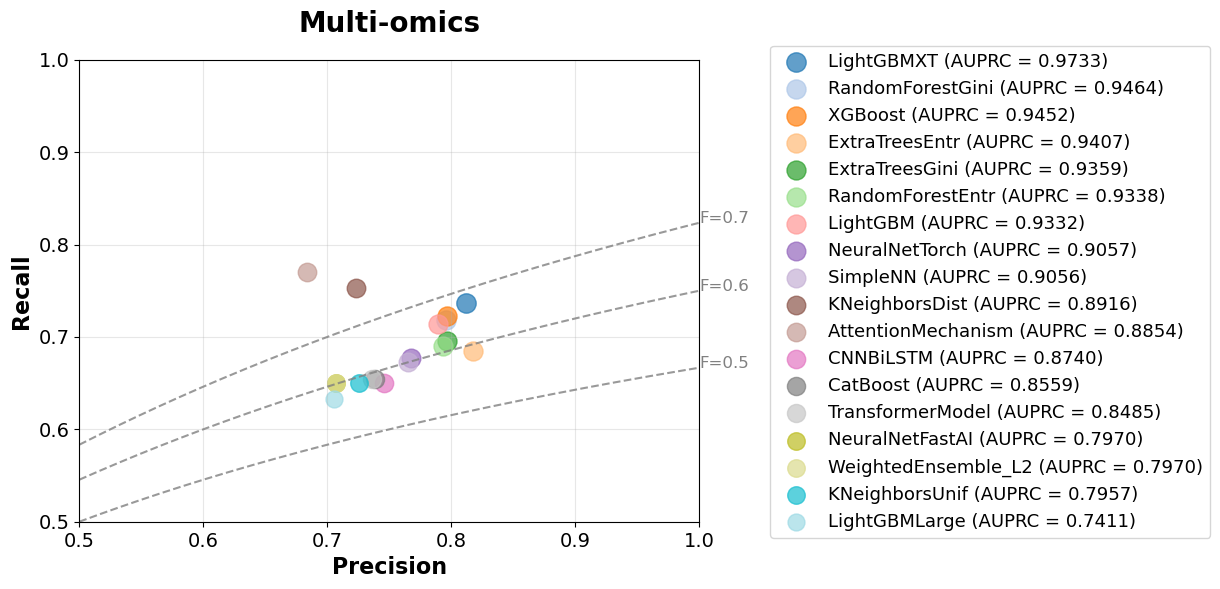

In [20]:
import torch
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

def plot_combined_roc_pr_curve_all(dl_model_files, dl_model_names, model_classes, autogluon_predictor, test_data, feature_type):
    """
    绘制深度学习模型的 ROC 曲线，以及 PR 曲线的散点图形式（包含 F1-score 等值线），并按 AUC 和 AP 排序。

    :param dl_model_files: 深度学习模型权重文件路径列表
    :param dl_model_names: 深度学习模型的名称列表
    :param model_classes: 深度学习模型类的字典 {model_name: model_class}
    :param autogluon_predictor: AutoGluon 预测器对象
    :param test_data: 测试数据，包括标签列 'label'
    :param feature_type: 使用的特征类型，用于数据预处理
    :param output_path: 输出图片的保存路径
    """
    # 检查数据有效性
    if 'label' not in test_data.columns:
        raise ValueError("The 'label' column is missing in the test_data.")

    y_true = test_data['label'].values  # 提取真实标签
    X_test = test_data.drop(columns=['label']).values  # 提取特征数据

    # 数据标准化
    scaler = StandardScaler()
    X_test = scaler.fit_transform(X_test)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # 统一存储所有模型的 AUC 和 PR 数据
    all_models_roc = {}
    all_models_pr = {}

    # 设置设备
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

     # 1. 处理深度学习模型
    print("Processing Deep Learning Models...")
    for i, file in enumerate(dl_model_files):
        model_name = dl_model_names[i]
        model_class = model_classes[model_name]

        # 加载模型及其权重
        model = model_class(input_dim=X_test.shape[1])
        model.load_state_dict(torch.load(file))
        model = model.to(device)
        model.eval()

        # 模型预测
        with torch.no_grad():
            y_pred = model(X_test_tensor.to(device)).cpu().squeeze().numpy()

        # 计算 ROC 曲线
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        all_models_roc[model_name] = (roc_auc, fpr, tpr)

        # 计算 PR 曲线
        precision, recall, _ = precision_recall_curve(y_true, y_pred)
        ap = average_precision_score(y_true, y_pred)  # Average Precision
        all_models_pr[model_name] = (ap, precision, recall)

    # 2. 处理 AutoGluon 模型
    print("Processing AutoGluon Models...")
    for model_name in autogluon_predictor.model_names():
        y_scores_df = autogluon_predictor.predict_proba(test_data.drop(columns=['label']), model=model_name)
        y_scores = y_scores_df.iloc[:, 1].values  # 提取正类概率

        # 计算 ROC 曲线
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        cleaned_model_name = model_name.replace('_BAG_L1', '')  # 清理模型名
        all_models_roc[cleaned_model_name] = (roc_auc, fpr, tpr)

        # 计算 PR 曲线
        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        ap = average_precision_score(y_true, y_scores)
        all_models_pr[cleaned_model_name] = (ap, precision, recall)

    # 3. 按 AUC 和 AP 排序
    sorted_models_roc = sorted(all_models_roc.items(), key=lambda x: x[1][0], reverse=True)  # 按 ROC AUC 排序
    sorted_models_pr = sorted(all_models_pr.items(), key=lambda x: x[1][0], reverse=True)  # 按 AP 排序

    # 4. 绘制 ROC 曲线
    plt.figure(figsize=(10, 8))
    ax = plt.gca()  # 获取当前坐标轴
    ax.set_facecolor('#f7f7f7')  # 设置背景颜色为浅灰色
    for model_name, (roc_auc, fpr, tpr) in sorted_models_roc:  # 按排序后的顺序绘制
        plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.4f})", linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label="Random (AUC = 0.5)")
    plt.title("Multi-omics", fontsize=24, weight='bold',pad=20)
    plt.xlabel("False Positive Rate", fontsize=20, weight='bold')
    plt.ylabel("True Positive Rate", fontsize=20, weight='bold')
    
    # 调整图例的位置，放置在图的外面（右侧）
    plt.legend(loc="upper left", fontsize=18, bbox_to_anchor=(1.05,1.1))# 将图例移到右侧
    plt.tick_params(axis='both', which='major', labelsize=16)  # 设置坐标轴刻度字体大小为14
    plt.grid(alpha=0.3)
    plt.savefig(f"1roc_all.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

    # 5. 绘制 PR 散点图
    plt.figure(figsize=(8, 6))

    # 添加 F1-score 等值线
    def plot_f1_lines():
        f1_scores = [0.5, 0.6, 0.7]  # F1 分数
        for f1 in f1_scores:
            x = np.linspace(0.5, 1, 500)  # Precision 范围
            y = (2 * f1 * x) / (f1 + x)  # 计算 Recall
            plt.plot(x, y, linestyle="--", color="gray", alpha=0.8)
            plt.text(x[-1], y[-1], f"F={f1:.1f}", fontsize=12, color='gray')

    plot_f1_lines()

    # 定义颜色和绘制模型散点
    colors = plt.cm.tab20(np.linspace(0, 1, len(sorted_models_pr)))  # 生成不同的颜色
    for idx, (model_name, (ap, precision, recall)) in enumerate(sorted_models_pr):  # 按排序后的顺序绘制
        precision_mean = precision.mean()
        recall_mean = recall.mean()
        plt.scatter(
            precision_mean, recall_mean,  # Precision 和 Recall 平均值
            s=ap * 200,  # AP 值控制点大小
            alpha=0.7,
            color=colors[idx],  # 使用不同颜色
            label=f"{model_name} (AUPRC = {ap:.4f})"
        )

    # 图表设置
    plt.title("Multi-omics", fontsize=20, weight='bold', pad=20)
    plt.xlabel("Precision", fontsize=16, weight='bold')
    plt.ylabel("Recall", fontsize=16, weight='bold')
    plt.xlim(0.5, 1.0)
    plt.ylim(0.5, 1.0)
    plt.tick_params(axis='both', which='major', labelsize=14)  # 设置坐标轴刻度字体大小为14
    
    # 将图例移到外面（右侧）
    plt.legend(bbox_to_anchor=(1.1, 1.05), loc='upper left', fontsize=13, frameon=True)  # 将图例移出图表
    plt.grid(alpha=0.3)

    # 保存并展示 PR 图
    plt.savefig(f"1pr_scatter_all.png", dpi=300, bbox_inches="tight")
    plt.show()

# 示例：输入参数
dl_model_files = [
    "TransformerModel_best_model_all.pt",
    "AttentionMechanism_best_model_all.pt",
    "SimpleNN_best_model_all.pt",
    "CNNBiLSTM_best_model_all.pt"
]
dl_model_names = ["TransformerModel", "AttentionMechanism", "SimpleNN", "CNNBiLSTM"]

# 模型类字典，需根据定义替换为实际类名
model_classes = {
    "TransformerModel": TransformerModel,
    "AttentionMechanism": AttentionMechanism,
    "SimpleNN": SimpleNN,
    "CNNBiLSTM": CNNBiLSTM
}

# 加载测试数据和 AutoGluon 预测器
test_data = test_data
predictor = predictor_all

# 调用函数绘制 ROC 和 PR 图
plot_combined_roc_pr_curve_all(dl_model_files, dl_model_names, model_classes, predictor, test_data, feature_type="Multi-omics")

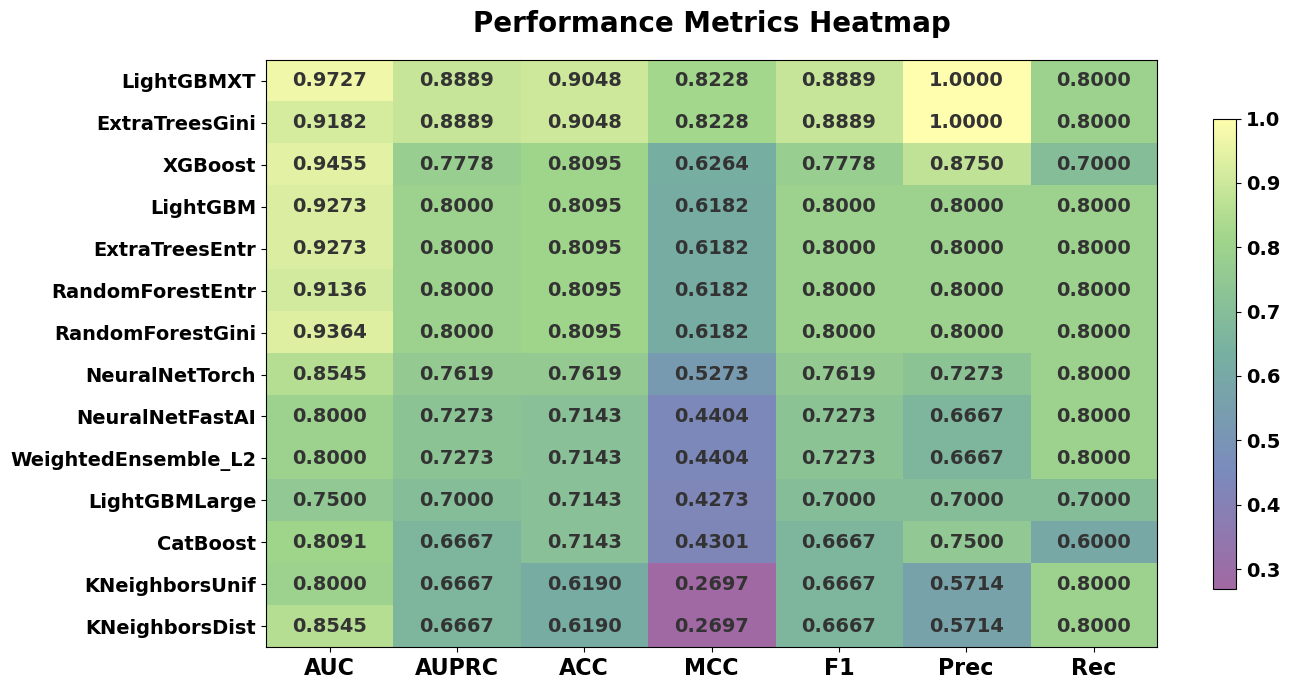

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# 读取数据文件
model_all = pd.read_csv("model_outcome_all.csv")

# 计算 PR 值 (F1 = 2 * (precision * recall) / (precision + recall))
model_all['pr'] = 2 * (model_all['precision'] * model_all['recall']) / (model_all['precision'] + model_all['recall'])

# 提取感兴趣的指标数据，并加入 PR 值
metrics_data = model_all[['roc_auc', 'pr', 'accuracy', 'mcc', 'f1', 'precision', 'recall']]

# 获取数值和标签
heatmap_data = metrics_data.values
labels = model_all['model']  # 使用模型名称作为行标签
columns = ['AUC', 'AUPRC', 'ACC', 'MCC', 'F1', 'Prec', 'Rec']  # 自定义简洁的列标签

# 创建一个饱和度降低的自定义颜色，从紫色到绿色到黄色
colors = ["#A169A3", "#7A8BBC", "#77B0A1", "#A1D68B", "#FFFDAE"]  # 更柔和的色彩
cmap_custom = LinearSegmentedColormap.from_list("custom_saturated", colors, N=256)

# 绘制热图
fig, ax = plt.subplots(figsize=(14, 7))
im = ax.imshow(heatmap_data, cmap=cmap_custom, aspect="auto")

# 添加数值标注
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        text = ax.text(
            j, i, f"{heatmap_data[i, j]:.4f}",
            ha="center", va="center",
            color="#333333", fontsize=14, fontweight="bold"  # 字体颜色调整为黑色
        )

# 设置 x 和 y 轴标签
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(columns, fontsize=16, fontweight="bold")
ax.set_yticklabels(labels, fontsize=14, fontweight="bold")

# 设置标题
ax.set_title("Performance Metrics Heatmap", fontsize=20, weight="bold", pad=20)

# 添加颜色条
cbar = fig.colorbar(im, ax=ax, shrink=0.8)

# 设置颜色条刻度字体加粗和字体大小
cbar.ax.tick_params(labelsize=14)
for tick_label in cbar.ax.get_yticklabels():
    tick_label.set_fontweight("bold")

# 调整布局并保存
plt.tight_layout()
plt.savefig("heatmap_with__metrics.png", dpi=300)
plt.show()

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# 读取数据文件
model_all = pd.read_csv("model_outcome_all.csv")

# --------------------- 新增：计算特异性（Specificity） ---------------------
# 假设数据中存在 tn（True Negative）和 fp（False Positive）列
# 处理分母为零的情况（例如设置为1或保留NaN）
model_all['specificity'] = model_all['tn'] / (model_all['tn'] + model_all['fp'])
model_all['specificity'] = model_all['specificity'].fillna(1.0)  # 分母为零时设为1
# -------------------------------------------------------------------------

# 计算 PR 值 (F1 = 2 * (precision * recall) / (precision + recall))
model_all['pr'] = 2 * (model_all['precision'] * model_all['recall']) / (model_all['precision'] + model_all['recall'])

# 提取感兴趣的指标数据，并加入 PR 值和特异性
metrics_data = model_all[['roc_auc', 'pr', 'accuracy', 'mcc', 'f1', 'precision', 'recall', 'specificity']]

# 获取数值和标签
heatmap_data = metrics_data.values
labels = model_all['model']  # 使用模型名称作为行标签
columns = ['AUC', 'AUPRC', 'ACC', 'MCC', 'F1', 'Prec', 'Rec', 'Specificity']  # 新增Specificity列

# 创建一个饱和度降低的自定义颜色，从紫色到绿色到黄色
colors = ["#A169A3", "#7A8BBC", "#77B0A1", "#A1D68B", "#FFFDAE"]  # 更柔和的色彩
cmap_custom = LinearSegmentedColormap.from_list("custom_saturated", colors, N=256)

# 绘制热图
fig, ax = plt.subplots(figsize=(16, 7))  # 调整宽度以适应新增列
im = ax.imshow(heatmap_data, cmap=cmap_custom, aspect="auto")

# 添加数值标注
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        text = ax.text(
            j, i, f"{heatmap_data[i, j]:.4f}",
            ha="center", va="center",
            color="#333333", fontsize=14, fontweight="bold"
        )

# 设置 x 和 y 轴标签
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(columns, fontsize=16, fontweight="bold")
ax.set_yticklabels(labels, fontsize=14, fontweight="bold")

# 设置标题
ax.set_title("Performance Metrics Heatmap", fontsize=20, weight="bold", pad=20)

# 添加颜色条
cbar = fig.colorbar(im, ax=ax, shrink=0.8)

# 设置颜色条刻度字体加粗和字体大小
cbar.ax.tick_params(labelsize=14)
for tick_label in cbar.ax.get_yticklabels():
    tick_label.set_fontweight("bold")

# 调整布局并保存
plt.tight_layout()
plt.savefig("heatmap111.png", dpi=300)
plt.show()

KeyError: 'tn'